# Loading

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import geopandas as gpd
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline

## Import Train Data

In [2]:
df_train = pd.read_csv('train.csv')
df_train

id   price balcony               conditions  construction_year  \
0      10461   60000    True  Buono stato / Abitabile             1980.0   
1      51304  900000     NaN  Buono stato / Abitabile                NaN   
2      33032   33000     NaN  Buono stato / Abitabile             1960.0   
3      62281  166000     NaN   Ottimo / Ristrutturato                NaN   
4      45681  410000    True  Buono stato / Abitabile                NaN   
...      ...     ...     ...                      ...                ...   
46307  33085  329999    True  Buono stato / Abitabile             1929.0   
46308  17403  599000    True         Da ristrutturare             1920.0   
46309  33332  549000    True  Buono stato / Abitabile                NaN   
46310  63367  189000    True  Buono stato / Abitabile             1965.0   
46311  27322  355000    True   Ottimo / Ristrutturato             1970.0   

        latitude  longitude  energy_efficiency  expenses  floor garden  \
0      41.901300  12.700000             175.00      30.0    2.0    NaN   
1      41.907017  12.481311                NaN       NaN    3.0    NaN   
2      41.976500  12.440500             204.20      30.0    4.0    NaN   
3      45.484800  12.198200             175.00       NaN    1.0   True   
4      45.424480  12.328622              65.91       NaN    3.0    NaN   
...          ...        ...                ...       ...    ...    ...   
46307  41.923500  12.446100             175.00      35.0    3.0    NaN   
46308  41.916743  12.454925                NaN     170.0    6.0    NaN   
46309  45.454701   9.242711                NaN       NaN    NaN    NaN   
46310  45.445605   9.245942                NaN     150.0   -1.0   True   
46311  41.877000  12.431400             175.00     100.0    1.0    NaN   

       n_bathrooms  elevator  total_floors  n_rooms  proximity_to_center  \
0              1.0       NaN           3.0      1.0              1.00000   
1              1.0       1.0           NaN      3.0              1.00000   
2              1.0       NaN           4.0      1.0              1.00000   
3              1.0       NaN           1.0      2.0              0.99205   
4              2.0       1.0           NaN      3.0              1.00000   
...            ...       ...           ...      ...                  ...   
46307          1.0       NaN           4.0      3.0              1.00000   
46308          2.0       1.0           NaN      5.0              1.00000   
46309          2.0       1.0           NaN      3.0              1.00000   
46310          1.0       1.0           NaN      3.0              1.00000   
46311          1.0       1.0           5.0      4.0              1.00000   

       surface  
0         35.0  
1        131.0  
2         16.0  
3        100.0  
4         90.0  
...        ...  
46307     88.0  
46308    189.0  
46309    140.0  
46310     70.0  
46311    101.0  

[46312 rows x 17 columns]

In [3]:
df_train.columns

Index(['id', 'price', 'balcony', 'conditions', 'construction_year', 'latitude',
       'longitude', 'energy_efficiency', 'expenses', 'floor', 'garden',
       'n_bathrooms', 'elevator', 'total_floors', 'n_rooms',
       'proximity_to_center', 'surface'],
      dtype='object')

# Exploratory Data Analysis

In [4]:
df_train.describe()

id         price  construction_year      latitude  \
count  46312.000000  4.631200e+04       32366.000000  46299.000000   
mean   32960.756132  5.031879e+05        1958.032874     43.534743   
std    19090.178152  1.106504e+06          72.021035      1.789416   
min        0.000000  1.540000e+02        1000.000000     41.690300   
25%    16466.500000  1.990000e+05        1950.000000     41.882400   
50%    32906.500000  3.150000e+05        1967.000000     41.960604   
75%    49489.250000  5.150000e+05        1987.000000     45.465800   
max    66159.000000  7.200000e+07        2500.000000     45.561298   

          longitude  energy_efficiency       expenses         floor  \
count  46299.000000       2.640900e+04   30158.000000  44281.000000   
mean      11.451295       5.091382e+03     195.285132      2.033333   
std        1.502453       7.600521e+05    4035.008418      2.175668   
min        9.060775       1.000000e-02       0.000000     -5.000000   
25%        9.221300       1.590000e+02      40.000000      1.000000   
50%       12.361864       1.750000e+02      80.000000      2.000000   
75%       12.487604       1.750000e+02     150.000000      3.000000   
max       12.854100       1.234570e+08  346000.000000     56.000000   

        n_bathrooms      elevator  total_floors       n_rooms  \
count  43896.000000  28869.000000  27963.000000  45959.000000   
mean       1.559140      0.952510      5.724207      3.284166   
std        0.769869      0.212689    191.115233      1.329654   
min        1.000000      0.000000      1.000000      1.000000   
25%        1.000000      1.000000      3.000000      2.000000   
50%        1.000000      1.000000      4.000000      3.000000   
75%        2.000000      1.000000      6.000000      4.000000   
max        9.000000      1.000000  31960.000000      9.000000   

       proximity_to_center       surface  
count         46299.000000  45869.000000  
mean              0.994756    114.866620  
std               0.030093     88.650549  
min               0.588014      0.000000  
25%               1.000000     68.000000  
50%               1.000000     91.000000  
75%               1.000000    130.000000  
max               1.000000    990.000000

In [5]:
# Check that the records are unique
assert df_train["id"].nunique() == len(df_train)

## Target Variable (Price)

In [6]:
df_train["price"].describe()

count    4.631200e+04
mean     5.031879e+05
std      1.106504e+06
min      1.540000e+02
25%      1.990000e+05
50%      3.150000e+05
75%      5.150000e+05
max      7.200000e+07
Name: price, dtype: float64

/var/folders/pq/60k1kqqn47j9qs8l3yf05hw00000gp/T/ipykernel_58187/1349010802.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['price'],ax=axes[0])


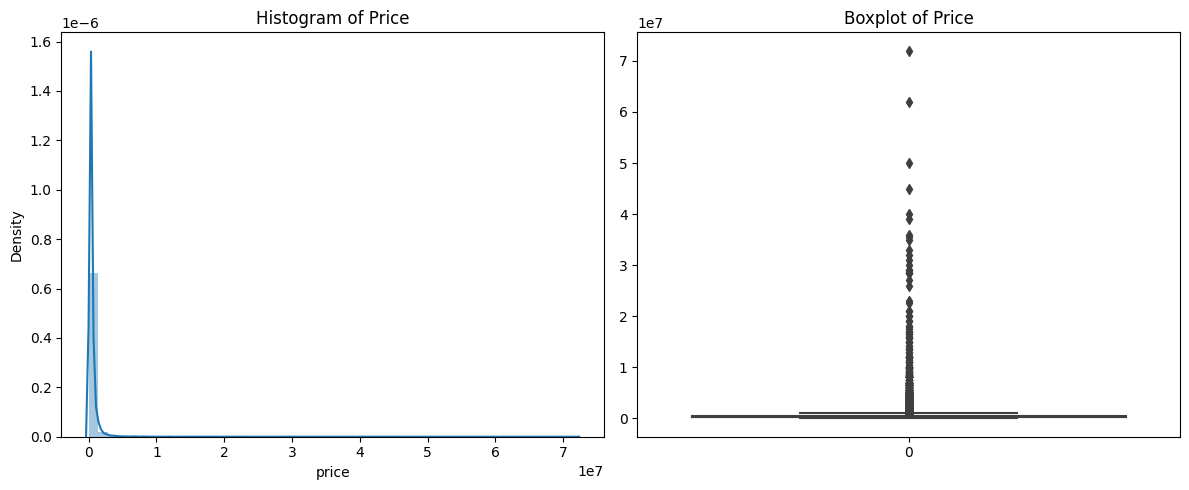

In [7]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

sns.distplot(df_train['price'],ax=axes[0])
sns.boxplot(df_train['price'],ax=axes[1])

axes[0].set_title("Histogram of Price")
axes[1].set_title("Boxplot of Price")

plt.tight_layout()
plt.show()

/var/folders/pq/60k1kqqn47j9qs8l3yf05hw00000gp/T/ipykernel_58187/2677897216.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df_train['price']),ax=axes[0])


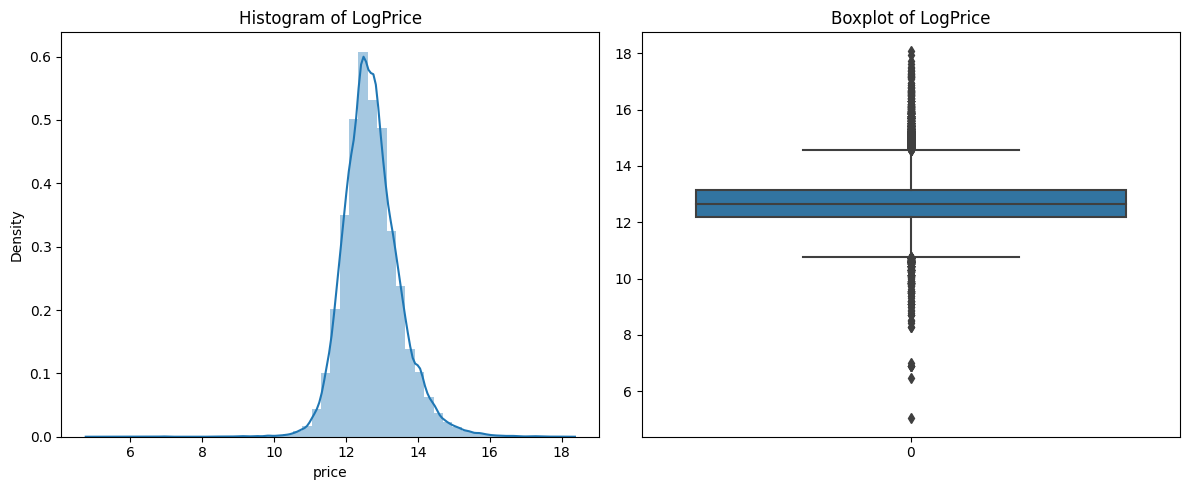

In [8]:
#Log of price for better visualization
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

sns.distplot(np.log(df_train['price']),ax=axes[0])
sns.boxplot(np.log(df_train['price']),ax=axes[1])

axes[0].set_title("Histogram of LogPrice")
axes[1].set_title("Boxplot of LogPrice")

plt.tight_layout()
plt.show()

## Correlations

/var/folders/pq/60k1kqqn47j9qs8l3yf05hw00000gp/T/ipykernel_58187/957812307.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df_train.corr()


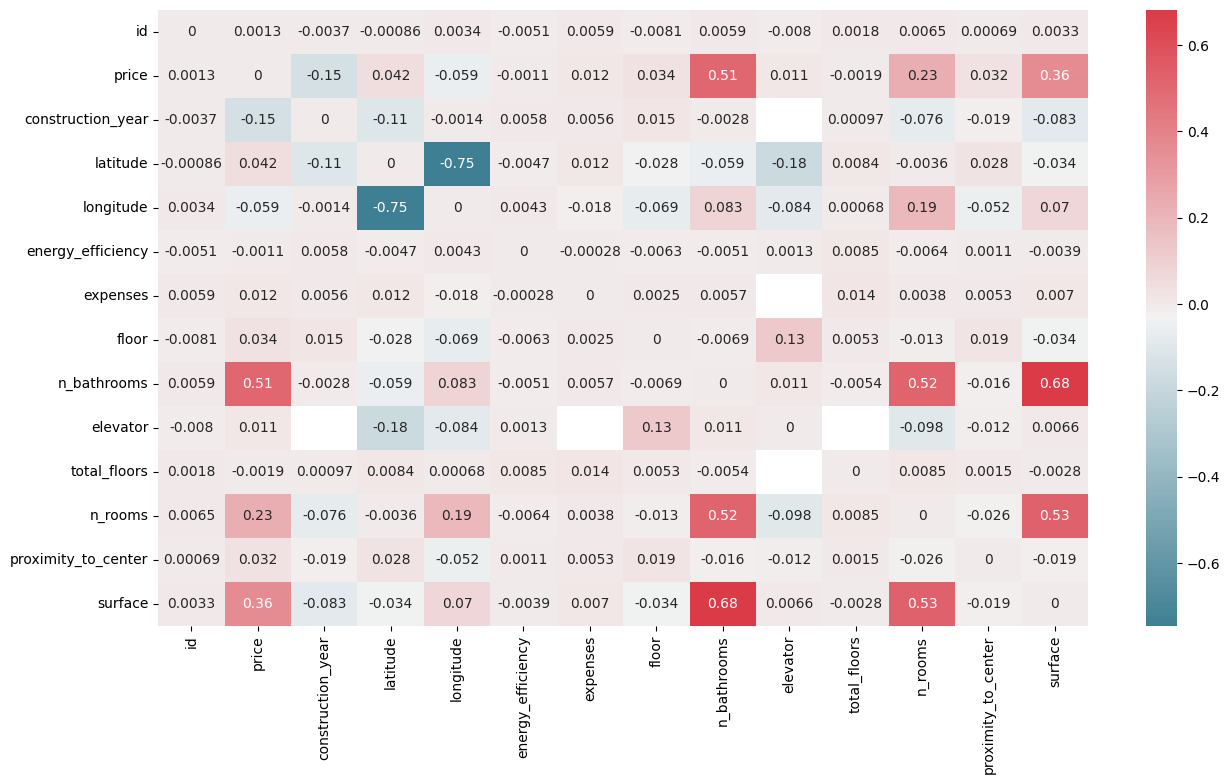

In [9]:
# Correlation Matrix
corrmat = df_train.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corrmat-np.eye(corrmat.shape[0]), annot = True, cmap = sns.diverging_palette(220, 10, as_cmap=True))
plt.show()

In [10]:
corrmat['price'].sort_values()

construction_year     -0.146158
longitude             -0.058596
total_floors          -0.001927
energy_efficiency     -0.001102
id                     0.001295
elevator               0.010874
expenses               0.011623
proximity_to_center    0.031700
floor                  0.033973
latitude               0.042099
n_rooms                0.232072
surface                0.360659
n_bathrooms            0.508281
price                  1.000000
Name: price, dtype: float64

## Missing Data Overview

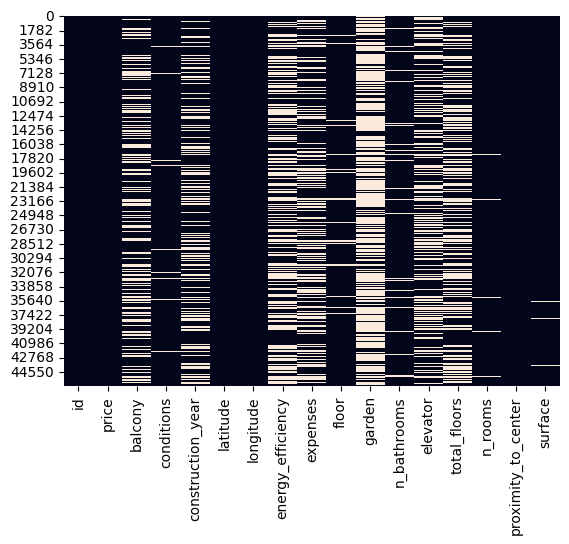

Total   Percent
garden               31529  0.680795
energy_efficiency    19903  0.429759
total_floors         18349  0.396204
elevator             17443  0.376641
expenses             16154  0.348808
balcony              15443  0.333456
construction_year    13946  0.301131
n_bathrooms           2416  0.052168
floor                 2031  0.043855
conditions            1229  0.026537
surface                443  0.009566
n_rooms                353  0.007622
longitude               13  0.000281
latitude                13  0.000281
proximity_to_center     13  0.000281
price                    0  0.000000
id                       0  0.000000

In [11]:
sns.heatmap(df_train.isna(), cbar=False)
plt.show() 
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

# Data Preparation

## Missing values and Outliers
I am going to handle missing values and remove serious outliers for each feature.

### Price

In [12]:
# Remove the most extreme values for price
initial_rows = df_train.shape[0]

df_train = df_train.loc[df_train['price'] < 5.1e7]
df_train = df_train.loc[np.log(df_train['price']) > 8]

df_train.reset_index(drop=True, inplace=True)

print(f"Number of outliers dropped: {initial_rows - df_train.shape[0]}")

Number of outliers dropped: 9


### Garden

In [13]:
nans = df_train["garden"].isna().sum()
print(f'Total nans: {nans}. Percentage: {nans/len(df_train)}')
df_train["garden"].value_counts()

Total nans: 31523. Percentage: 0.6807982204176836


True    14780
Name: garden, dtype: int64

In [14]:
# Since there are 68% of nans, I'll just drop the feature
df_train.drop('garden',axis=1, inplace=True)

### Balcony

In [15]:
nans = df_train["balcony"].isna().sum()
print(f'Total nans: {nans}. Percentage: {nans/len(df_train)}')
df_train["balcony"].value_counts()

Total nans: 15437. Percentage: 0.33339092499406087


True    30866
Name: balcony, dtype: int64

In [16]:
# Each value is either True or nan, so I'll assume that nan means 'False', and replace the nans with zeros.
df_train["balcony"].fillna(0.0, inplace=True)
df_train["balcony"] = df_train["balcony"].astype(int)
df_train["balcony"].value_counts()

1    30866
0    15437
Name: balcony, dtype: int64

In [17]:
print('Correlation:', df_train.corr()["balcony"]['price'])

Correlation: -0.004003571196735833


/var/folders/pq/60k1kqqn47j9qs8l3yf05hw00000gp/T/ipykernel_58187/504847654.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Correlation:', df_train.corr()["balcony"]['price'])


In [18]:
# Also after having filled the missing values, the correlation is very weak, so I drop the column
df_train.drop('balcony',axis=1, inplace=True)

### Expenses

In [19]:
nans = df_train["expenses"].isna().sum()
print(f'Total nans: {nans}. Percentage: {nans/len(df_train)}')

Total nans: 16148. Percentage: 0.34874630153553765


In [20]:
print('Correlation:', df_train.corr()["expenses"]['price'])

Correlation: 0.011621343030046642


/var/folders/pq/60k1kqqn47j9qs8l3yf05hw00000gp/T/ipykernel_58187/1473373757.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Correlation:', df_train.corr()["expenses"]['price'])


In [21]:
# The correlation is very weak, and there are many nans, so I just drop the column.
df_train.drop('expenses',axis=1, inplace=True)

### Energy efficiency

In [22]:
nans = df_train["energy_efficiency"].isna().sum()
print(f'Total nans: {nans}. Percentage: {nans/len(df_train)}')

Total nans: 19899. Percentage: 0.4297561713063948


In [23]:
print('Correlation:', df_train.corr()["energy_efficiency"]['price'])

Correlation: -0.0012398468958903543


/var/folders/pq/60k1kqqn47j9qs8l3yf05hw00000gp/T/ipykernel_58187/615611423.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Correlation:', df_train.corr()["energy_efficiency"]['price'])


In [24]:
# The correlation is very weak, and there are many nans, so
# even though there are outliers, I just drop the column.
df_train.drop('energy_efficiency',axis=1, inplace=True)

### Total floors

In [25]:
nans = df_train["total_floors"].isna().sum()
print(f'Total nans: {nans}. Percentage: {nans/len(df_train)}')

Total nans: 18345. Percentage: 0.3961946310174287


In [26]:
# It seems that we have a building with more than 30k floors, which is clearly an error, so we need to remove it.
initial_rows = df_train.shape[0]
df_train.drop(df_train['total_floors'].argmax(), inplace=True)
print(f"Number of outliers dropped: {initial_rows - df_train.shape[0]}")


Number of outliers dropped: 1


In [27]:
print('Correlation:', df_train.corr()["total_floors"]['price'])

Correlation: -0.012252887716951507


/var/folders/pq/60k1kqqn47j9qs8l3yf05hw00000gp/T/ipykernel_58187/1714597345.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Correlation:', df_train.corr()["total_floors"]['price'])


In [28]:
# The correlation is very weak, and there are many nans, I drop the column.
df_train.drop('total_floors',axis=1, inplace=True)

### elevator

In [29]:
nans = df_train["elevator"].isna().sum()
print(f'Total nans: {nans}. Percentage: {nans/len(df_train)}')
df_train["elevator"].value_counts()

Total nans: 17435. Percentage: 0.3765496090881603


1.0    27496
0.0     1371
Name: elevator, dtype: int64

In [30]:
# Let's assume that the nans are zeros
df_train["elevator"].fillna(0.0, inplace=True)
df_train["elevator"].value_counts()

1.0    27496
0.0    18806
Name: elevator, dtype: int64

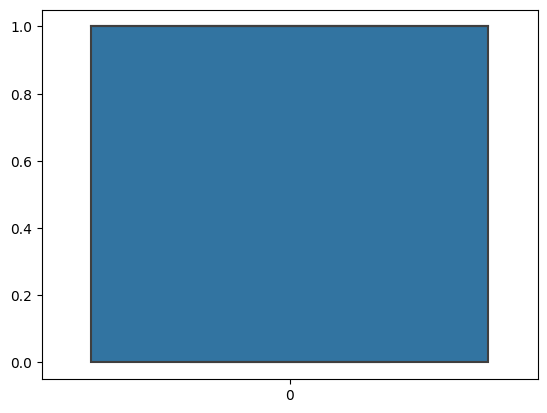

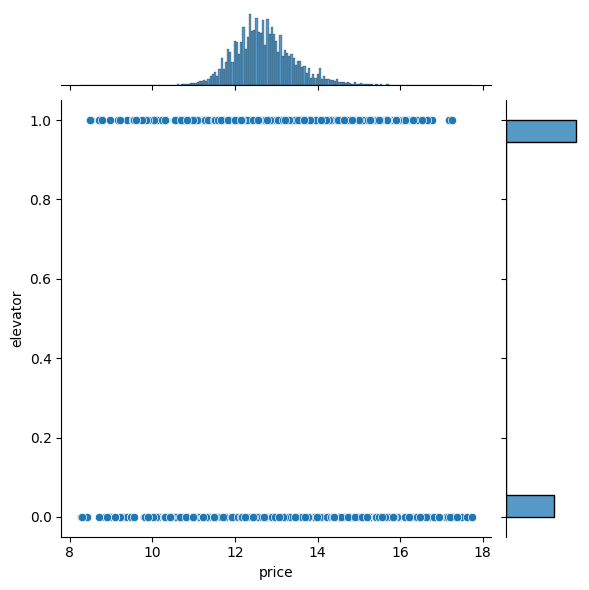

In [31]:
sns.boxplot(df_train['elevator'])

sns.jointplot(data=df_train, x =np.log(df_train['price']), y = 'elevator')

plt.show()

In [32]:
print('Correlation:', df_train.corr()["elevator"]['price'])

Correlation: 0.004655201977657946


/var/folders/pq/60k1kqqn47j9qs8l3yf05hw00000gp/T/ipykernel_58187/236131077.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Correlation:', df_train.corr()["elevator"]['price'])


In [33]:
#The correlation is almost zero, so it is probably the case to drop the column
df_train.drop('elevator',axis=1, inplace=True)

### Position (longitude and latitude)

In [34]:
nans = df_train["latitude"].isna().sum()
print(f'Total nans: {nans}. Percentage: {nans/len(df_train)}')

Total nans: 13. Percentage: 0.00028076540970152475


In [35]:
nans = df_train["longitude"].isna().sum()
print(f'Total nans: {nans}. Percentage: {nans/len(df_train)}')

Total nans: 13. Percentage: 0.00028076540970152475


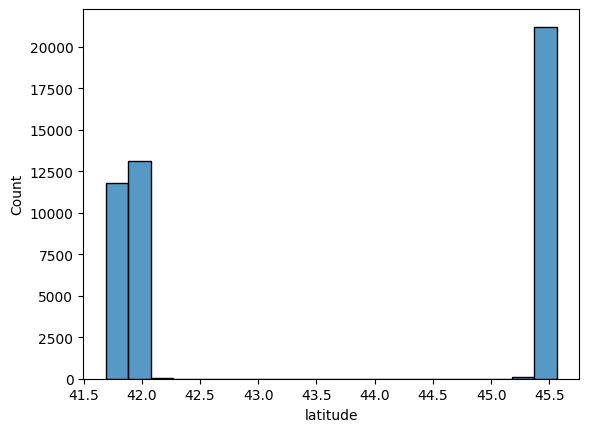

In [36]:
sns.histplot(df_train['latitude'])

plt.show()

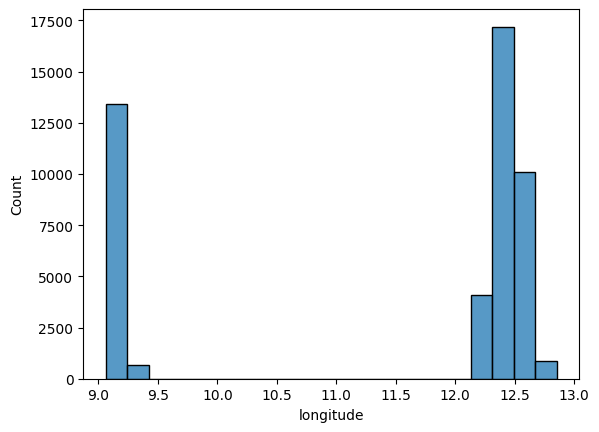

In [37]:
sns.histplot(df_train['longitude'])

plt.show()

In [38]:
# We remove those houses (13) for which we don't have the location
df_train = df_train.loc[df_train['latitude'].isna() == False]
df_train = df_train.loc[df_train['longitude'].isna() == False]

### proximity_to_center

In [39]:
nans = df_train["proximity_to_center"].isna().sum()
print(f'Total nans: {nans}. Percentage: {nans/len(df_train)}')
#We already removed them when dealing with position

Total nans: 0. Percentage: 0.0


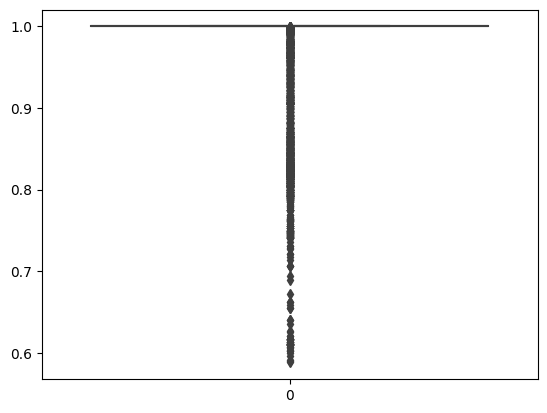

In [40]:
sns.boxplot(df_train['proximity_to_center'])

plt.show()

### n_rooms

In [41]:
nans = df_train["n_rooms"].isna().sum()
print(f'Total nans: {nans}. Percentage: {nans/len(df_train)}')

Total nans: 351. Percentage: 0.007582795048499643


In [42]:
# Fill the null values with the median, since it is less sensitive to outliers than the mean
median_rooms = int(df_train['n_rooms'].median())
df_train['n_rooms'] = df_train['n_rooms'].fillna(median_rooms)

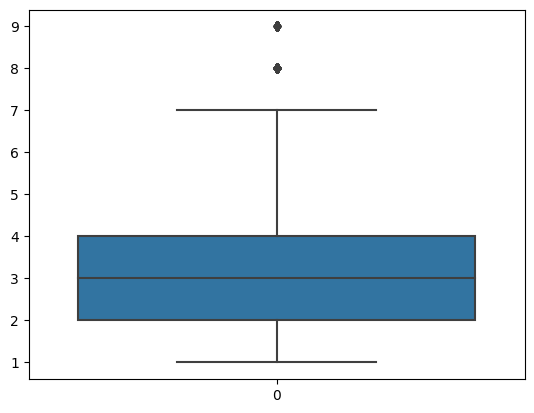

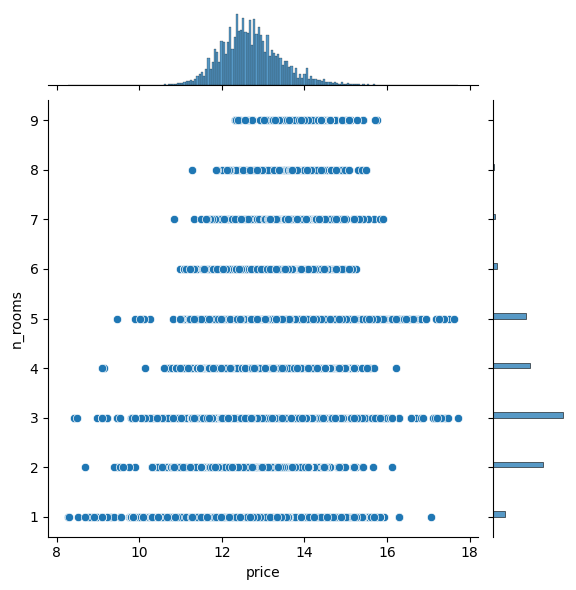

In [43]:
sns.boxplot(df_train['n_rooms'])

sns.jointplot(data=df_train, x =np.log(df_train['price']), y = 'n_rooms')

plt.show()

### n_bathrooms


In [44]:
nans = df_train["n_bathrooms"].isna().sum()
print(f'Total nans: {nans}. Percentage: {nans/len(df_train)}')

Total nans: 2413. Percentage: 0.052129015532847975


In [45]:
# Fill the null values with the median, since it is less sensitive to outliers than the mean
median_baths = int(df_train['n_bathrooms'].median())
df_train['n_bathrooms'] = df_train['n_bathrooms'].fillna(median_baths)

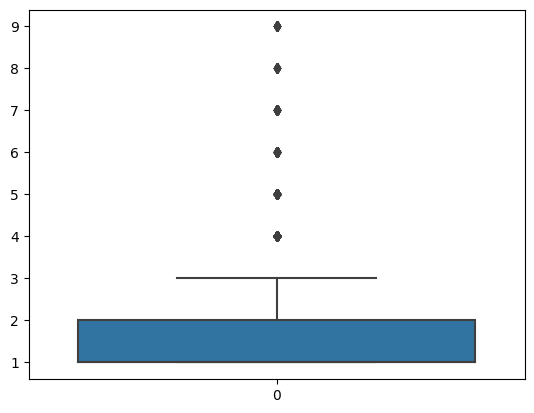

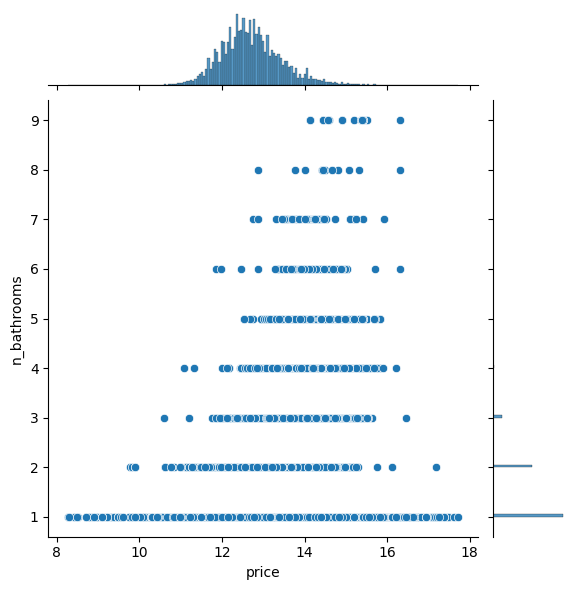

In [46]:
sns.boxplot(df_train['n_bathrooms'])

sns.jointplot(data=df_train, x =np.log(df_train['price']), y = 'n_bathrooms')

plt.show()

### Surface


In [47]:
nans = df_train["surface"].isna().sum()
print(f'Total nans: {nans}. Percentage: {nans/len(df_train)}')

Total nans: 443. Percentage: 0.00957030828058502


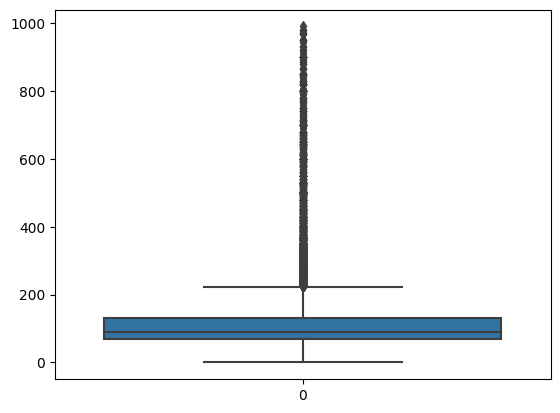

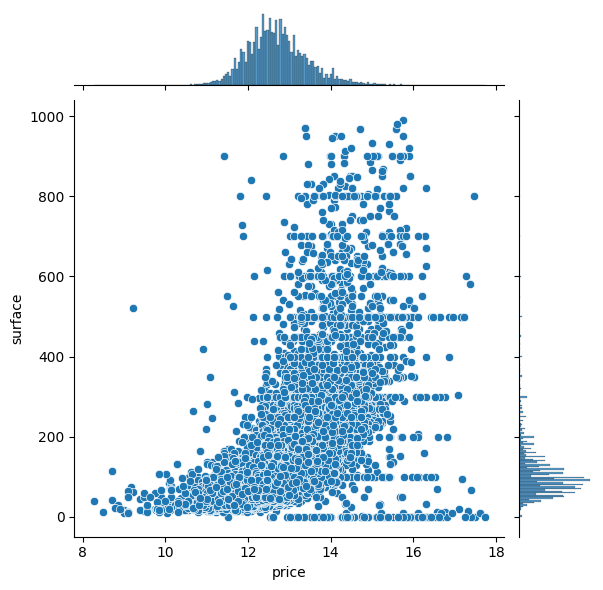

In [48]:
sns.boxplot(df_train['surface'])

sns.jointplot(data=df_train, x =np.log(df_train['price']), y = 'surface')

plt.show()

In [49]:
# Note that it could be the case to impute the surface exploiting the information given by n_rooms and n_bathrooms

# Take those records with records for surface, rooms, and bathrooms. Use as train set
X = df_train.loc[df_train['n_rooms'].isna() == False]
X = X.loc[X['n_bathrooms'].isna() == False]
X = X.loc[X['surface'].isna() == False]

X_train = X[['n_bathrooms','n_rooms']]
y_train = X['surface']

#  # rows for which we want to predict price
X_test = df_train.loc[df_train['surface'].isna()][['n_bathrooms','n_rooms']]
X_test['n_bathrooms'].fillna(df_train['n_bathrooms'].median(), inplace=True)
X_test['n_rooms'].fillna(df_train['n_rooms'].median(), inplace=True)

model_surface = LinearRegression()
model_surface.fit(X_train, y_train)
pred_surface = model_surface.predict(X_test)
df_train.loc[df_train['surface'].isna(),'surface'] = pred_surface

# median_surface = df_train.surface.median()
# df_train['surface'] = df_train['surface'].fillna(median_surface)


### Conditions

In [50]:
nans = df_train["conditions"].isna().sum()
print(f'Total nans: {nans}. Percentage: {nans/len(df_train)}')
df_train["conditions"].value_counts()

Total nans: 1227. Percentage: 0.026507377562703882


Buono stato / Abitabile      21816
Ottimo / Ristrutturato       10526
Nuovo / Nuova costruzione     7043
Da ristrutturare              5677
Name: conditions, dtype: int64

In [51]:
# Replace categorical variable with ordinal encoding. For the nans, since we don't know what the conditions are, I'll use a fifth value.
df_train['conditions'] = df_train['conditions'].replace({'Da ristrutturare': 1, 'Buono stato / Abitabile': 2, 'Nuovo / Nuova costruzione': 3, 'Ottimo / Ristrutturato': 4 })
df_train['conditions'] = df_train['conditions'].fillna(0)

[Text(0, 0, '0.0'),
 Text(1, 0, '1.0'),
 Text(2, 0, '2.0'),
 Text(3, 0, '3.0'),
 Text(4, 0, '4.0')]

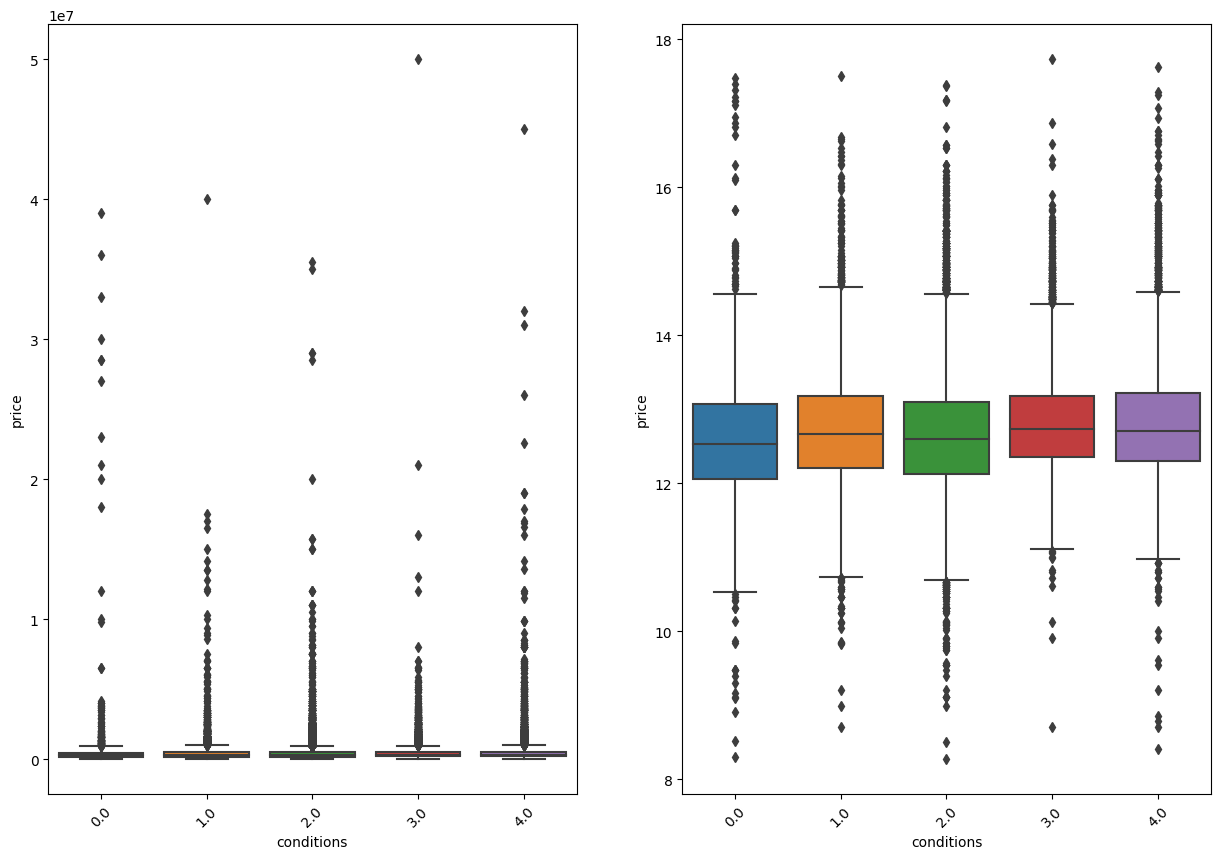

In [52]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 10))
sns.boxplot(data=df_train, x="conditions", y="price", ax=axs[0])
sns.boxplot(data=df_train, x="conditions", y=np.log(df_train['price']), ax=axs[1])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)

### Floor

In [53]:
nans = df_train["floor"].isna().sum()
print(f'Total nans: {nans}. Percentage: {nans/len(df_train)}')

Total nans: 2029. Percentage: 0.04383330812936119


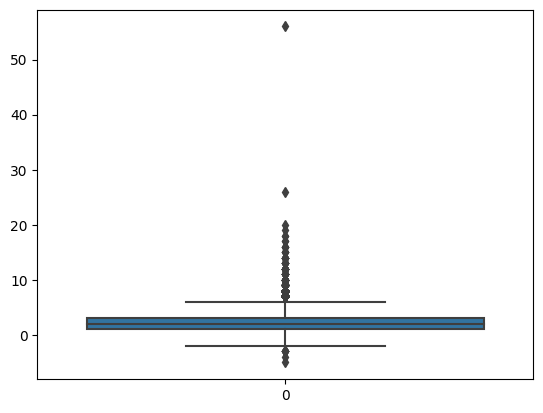

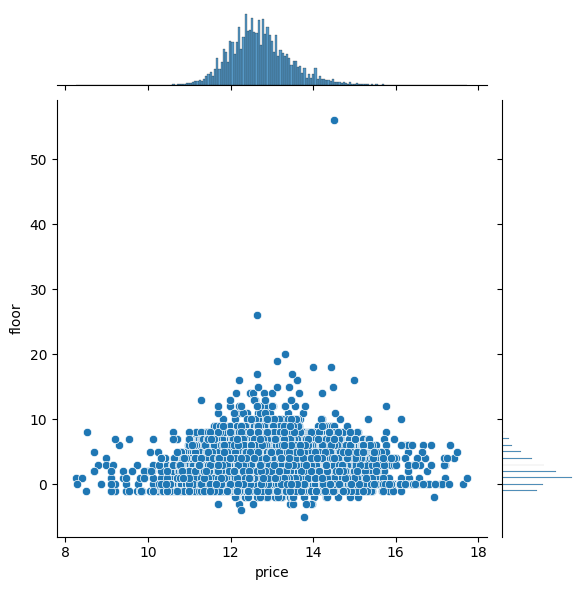

In [54]:
sns.boxplot(df_train['floor'])

sns.jointplot(data=df_train, x =np.log(df_train['price']), y = 'floor')

plt.show()

In [55]:
# We have a record with floor == 56. Remove it.
df_train.drop(df_train.loc[df_train['floor'] == 56].index,axis=0, inplace=True)

In [56]:
# Use a KNN imputer to fill the nans
imputer = KNNImputer(n_neighbors=5)
imputer.fit(df_train.drop('price',axis = 1).loc[:, :])

KNNImputer()

In [57]:
df_train["floor"] =  imputer.transform(df_train.drop('price',axis = 1).loc[:, :])[:,5]

In [58]:
df_train['floor'] = np.round(df_train['floor'])

In [59]:
df_train['floor'].value_counts()

 1.0     10447
 2.0      8356
 3.0      6350
 0.0      5950
-1.0      4927
 4.0      4382
 5.0      2695
 6.0      1451
 7.0      1058
 8.0       419
 9.0       115
 10.0       37
-2.0        29
 12.0       17
 11.0       13
 14.0        9
-3.0         8
 13.0        8
 16.0        4
 15.0        4
 18.0        2
 17.0        2
 26.0        1
-4.0         1
 19.0        1
-5.0         1
 20.0        1
Name: floor, dtype: int64

### Construction Year

In [60]:
nans = df_train["construction_year"].isna().sum()
print(f'Total nans: {nans}. Percentage: {nans/len(df_train)}')

Total nans: 13933. Percentage: 0.3010067404078811


In [61]:
print('Correlation:', df_train.corr()["construction_year"]['price'])

Correlation: -0.16465941223222058


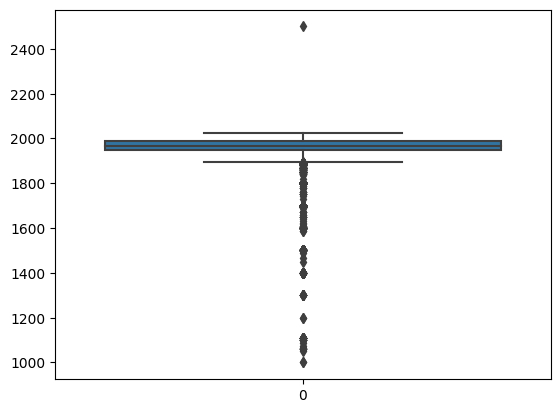

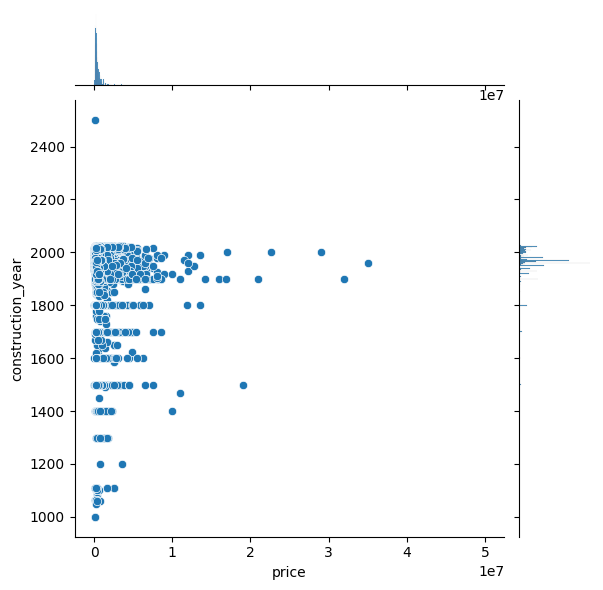

In [62]:
sns.boxplot(df_train['construction_year'])

sns.jointplot(data=df_train, x = 'price', y = 'construction_year')

plt.show()

In [63]:
# It seems that we have an house built in 2500, which is clearly an error, so we need to remove it.
initial_rows = df_train.shape[0]
df_train.drop(df_train['construction_year'].argmax(), inplace=True)
print(f"Number of outliers dropped: {initial_rows - df_train.shape[0]}")

Number of outliers dropped: 1


In [64]:
# Use the KNN imputer to fill the nans
df_train["construction_year"] = imputer.transform(df_train.drop('price',axis = 1).loc[:, :])[:,2]

In [65]:
df_train['construction_year'] = np.round(df_train['construction_year'])
df_train['construction_year'].value_counts()

1960.0    5317
1970.0    3898
1980.0    1906
1950.0    1900
1900.0    1433
          ... 
1756.0       1
1468.0       1
1716.0       1
1824.0       1
1818.0       1
Name: construction_year, Length: 306, dtype: int64

### Check that there are no missing values

In [66]:
assert not df_train.isna().sum().sum()

## Feature augmentation

### City

Since to which urban area the city belong would probably be an important information, I'm going to use the information provided by latitude and longitude to impute it.

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

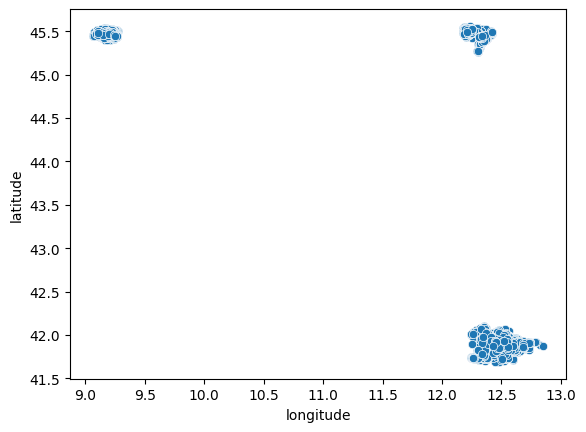

In [67]:
# First, we draw a scatterplot of the houses according to latitude and longitude
sns.scatterplot(data=df_train, x='longitude', y = 'latitude')

Houses from the dataframe seems to belong to three different areas.

Let's now visualize on a map the location of the houses, in order to understand near to which cities they're located. I'll use the geopandas library to achieve this.

In [68]:
Borders = ((df_train.longitude.min(),   df_train.longitude.max(),      
         df_train.latitude.min(), df_train.latitude.max()))
Borders

(9.0607748, 12.8541, 41.6903, 45.56129837)

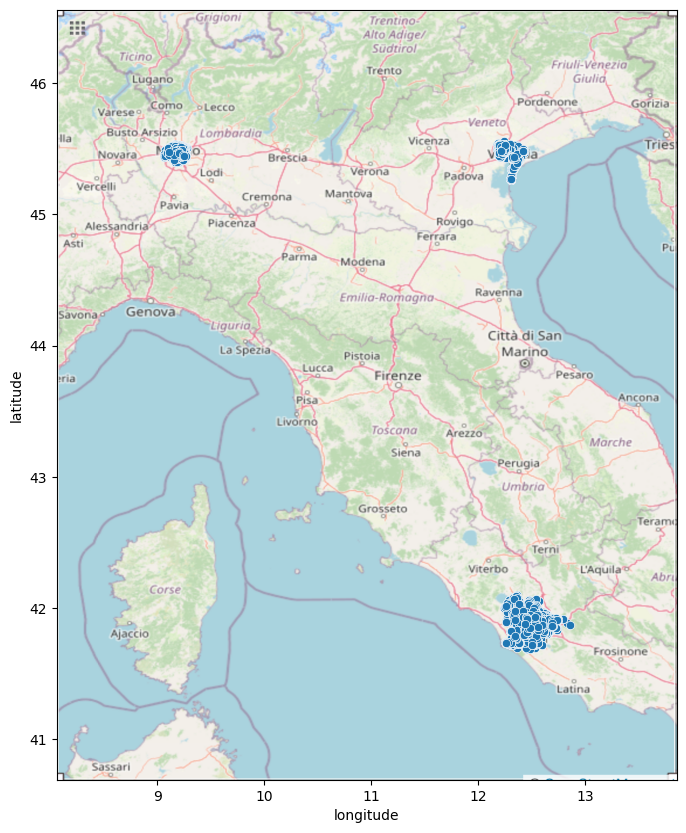

In [69]:
# Load the PNG image
image_path = 'Italy.png'
image = mpimg.imread(image_path)

fig = plt.figure(figsize=(8,10))

plt.imshow(image, extent=[8.0607748, 13.8541, 40.6903, 46.56129837], aspect='auto')

sns.scatterplot(data=df_train, x='longitude', y='latitude')

plt.show()

The three cities seems to be Rome, Milan, and Venice, so we add a categorical column to the dataset and assign to each house a city.

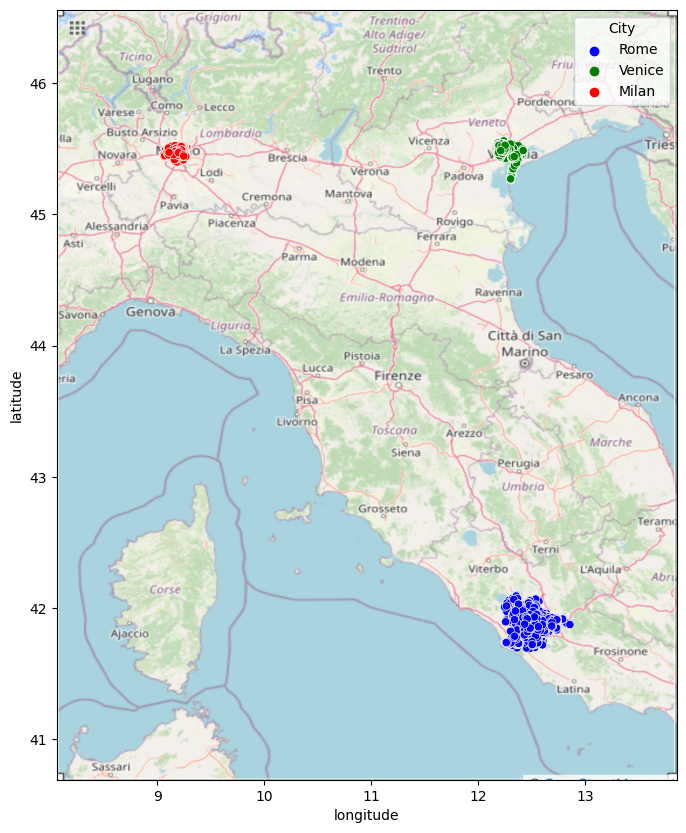

In [70]:
df_train['City'] = np.zeros(len(df_train))
df_train.loc[df_train['latitude'] < 44, 'City'] = 'Rome'
df_train.loc[df_train['longitude'] < 10, 'City'] = 'Milan'
df_train.loc[df_train['City'] == 0.0, 'City'] = 'Venice'

# Visually check that the clustering is correct
image_path = 'Italy.png'
image = mpimg.imread(image_path)

fig = plt.figure(figsize=(8,10))

plt.imshow(image, extent=[8.0607748, 13.8541, 40.6903, 46.56129837], aspect='auto')

sns.scatterplot(data=df_train, x='longitude', y='latitude', hue='City', palette=['blue', 'green', 'red'])

plt.show()

<AxesSubplot: xlabel='City', ylabel='price'>

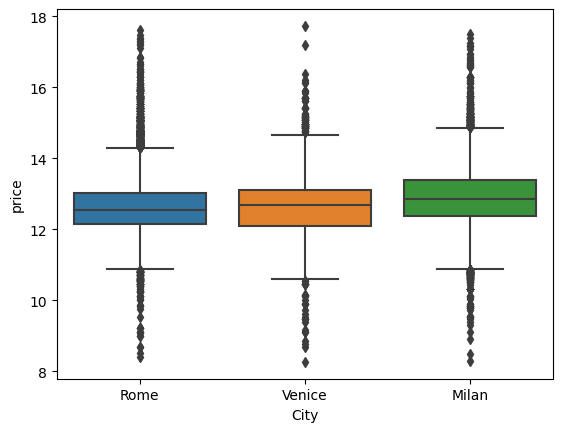

In [71]:
sns.boxplot(data=df_train, x="City", y=np.log(df_train["price"]))
# sns.boxplot(data=df_train, x="City", y="price")

### Distance from city center

Now I am going to add a feature with the distance of the house from the respective city center.

In [72]:
# Create a dictionary with the coordinates of the city center for each city
city_centers = {'Milan':(45.463506, 9.191373), 'Rome':(41.895595, 12.482574), 'Venice': (45.434048, 12.338378)}

Rome = df_train.loc[df_train['City']=='Rome'].loc[:,['longitude','latitude']]
Milan = df_train.loc[df_train['City']=='Milan'].loc[:,['longitude','latitude']]
Venice = df_train.loc[df_train['City']=='Venice'].loc[:,['longitude','latitude']]

In [73]:
# The haversine_distance function computes the distances in km of the houses from the city center, given the coordinates.
def haversine_distance(lat1, lon1, lat2, lon2):
    lat1 = np.array(lat1)
    lon1 = np.array(lon1)
    lat2 = np.array(lat2)
    lon2 = np.array(lon2)
    # Radius of the earth in km
    R = 6371 

    # Convert latitude and longitude to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c

    return distance

In [74]:
# Add the feature to the dataframe

df_train['distance_from_center'] = np.zeros(len(df_train))

lats_RM = np.array(Rome['latitude'])
longs_RM = np.array(Rome['longitude'])

lats_MI = np.array(Milan['latitude'])
longs_MI = np.array(Milan['longitude'])

lats_VE = np.array(Venice['latitude'])
longs_VE = np.array(Venice['longitude'])

# np.full(len(lats_MI),city_centers['Milan'][0])

df_train.loc[df_train['City']=='Milan','distance_from_center'] = haversine_distance(lats_MI,longs_MI, city_centers['Milan'][0],city_centers['Milan'][1])
df_train.loc[df_train['City']=='Rome','distance_from_center'] = haversine_distance(lats_RM,longs_RM, city_centers['Rome'][0],city_centers['Rome'][1])
df_train.loc[df_train['City']=='Venice','distance_from_center'] = haversine_distance(lats_VE,longs_VE, city_centers['Venice'][0],city_centers['Venice'][1])


### Neighborhoods

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/pq/60k1kqqn47j9qs8l3yf05hw00000gp/T/ipykernel_58187/1869500115.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Milan_train['Neighborhood'] = clusters
/var/folders/pq/60k1kqqn47j9qs8l3yf05hw00000gp/T/ipykernel_58187/1869500115.py:19: UserWarning: 
The palette list has fewer values (13) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=Milan_train, x='longitude', y='latitude', hue='Neighborhood', palette=['Brown','b

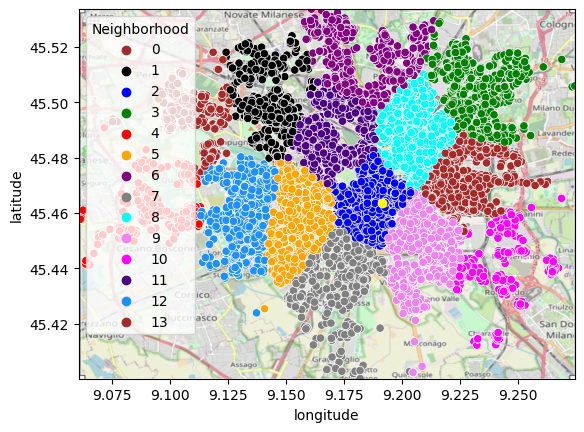

In [75]:
#Milan

Milan_train = df_train.loc[df_train['City'] == 'Milan'] #get the df of houses in Milan's area
pos = Milan_train.loc[:,['longitude','latitude']]
kmeans = KMeans(n_clusters=14, random_state = 31) # cluster  the houses in neighbourhoods using KMeans
kmeans.fit(pos)
clusters = kmeans.predict(pos)
cluster_centers_MI = kmeans.cluster_centers_ # Get the cluster centers for later
Milan_train['Neighborhood'] = clusters

Borders = ((Milan_train.longitude.min(),   Milan_train.longitude.max(),      
         Milan_train.latitude.min(), Milan_train.latitude.max())) # borders for plotting

# Load the PNG image
image_path = 'Milan.png'
image = mpimg.imread(image_path)

plt.imshow(image, extent=[Borders[0], Borders[1], Borders[2], Borders[3]], aspect='auto')
sns.scatterplot(data=Milan_train, x='longitude', y='latitude', hue='Neighborhood', palette=['Brown','black','blue', 'green', 'red', 'orange','purple','grey','cyan','Violet','magenta','Indigo','dodgerblue'])
plt.scatter(x = city_centers['Milan'][1], y = city_centers['Milan'][0], c = 'yellow') # City center
plt.show
df_train['neighborhood'] = np.zeros(len(df_train))
df_train.loc[df_train['City']=='Milan', 'neighborhood'] = Milan_train['Neighborhood']



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/pq/60k1kqqn47j9qs8l3yf05hw00000gp/T/ipykernel_58187/2693451483.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rome_train['Neighborhood'] = clusters
/var/folders/pq/60k1kqqn47j9qs8l3yf05hw00000gp/T/ipykernel_58187/2693451483.py:18: UserWarning: 
The palette list has fewer values (12) than needed (25) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=Rome_train, x='longitude', y='latitude', hue='Neighborhood', palette=['Brown','bla

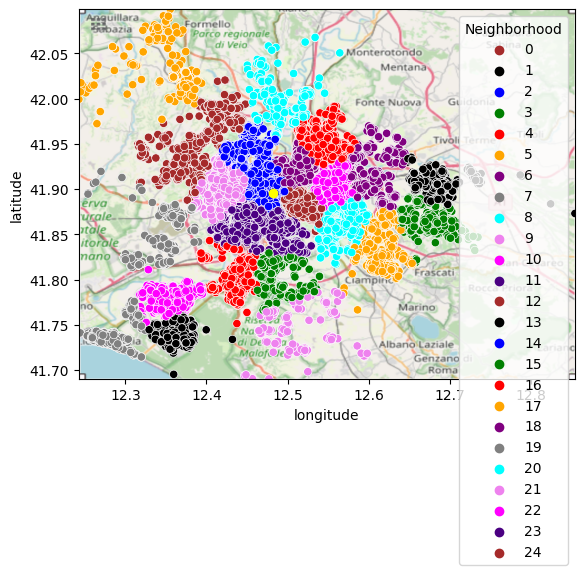

In [76]:
#### Rome
Rome_train = df_train.loc[df_train['City'] == 'Rome']
pos = Rome_train.loc[:,['longitude','latitude']]
kmeans = KMeans(n_clusters=25, random_state=30)
kmeans.fit(pos)
clusters = kmeans.predict(pos)
cluster_centers_RM = kmeans.cluster_centers_
Rome_train['Neighborhood'] = clusters

Borders = ((Rome_train.longitude.min(),   Rome_train.longitude.max(),      
         Rome_train.latitude.min(), Rome_train.latitude.max()))

image_path = 'Rome.png'
image = mpimg.imread(image_path)

plt.imshow(image, extent=[Borders[0], Borders[1], Borders[2], Borders[3]], aspect='auto')

sns.scatterplot(data=Rome_train, x='longitude', y='latitude', hue='Neighborhood', palette=['Brown','black','blue', 'green', 'red', 'orange','purple','grey','cyan','Violet','magenta','Indigo'])
plt.scatter(x = city_centers['Rome'][1], y = city_centers['Rome'][0], c = 'yellow')
plt.show()
df_train.loc[df_train['City']=='Rome', 'neighborhood'] = Rome_train['Neighborhood']+len(cluster_centers_MI)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/pq/60k1kqqn47j9qs8l3yf05hw00000gp/T/ipykernel_58187/3341451478.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Venice_train['Neighborhood'] = clusters
/var/folders/pq/60k1kqqn47j9qs8l3yf05hw00000gp/T/ipykernel_58187/3341451478.py:18: UserWarning: The palette list has more values (12) than needed (8), which may not be intended.
  sns.scatterplot(data=Venice_train, x='longitude', y='latitude', hue='Neighborhood', palette=['Brown','black','blue', 'green', 'red', 'o

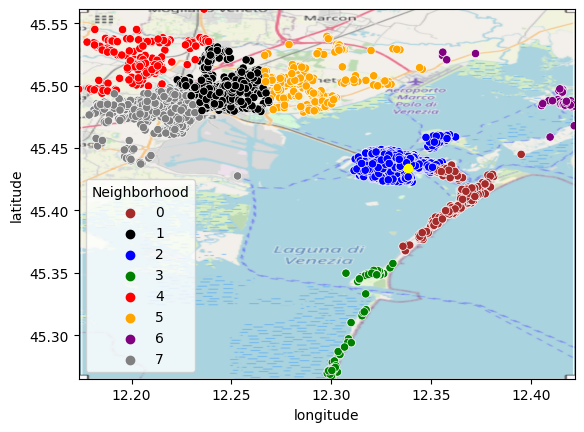

In [77]:
#### Venice

Venice_train = df_train.loc[df_train['City'] == 'Venice']
pos = Venice_train.loc[:,['longitude','latitude']]
kmeans = KMeans(n_clusters=8, random_state=31)
kmeans.fit(pos)
clusters = kmeans.predict(pos)
cluster_centers_VE = kmeans.cluster_centers_
Venice_train['Neighborhood'] = clusters
Borders = ((Venice_train.longitude.min(),   Venice_train.longitude.max(),      
         Venice_train.latitude.min(), Venice_train.latitude.max()))
# Load the PNG image
image_path = 'Venice.png'
image = mpimg.imread(image_path)

plt.imshow(image, extent=[Borders[0], Borders[1], Borders[2], Borders[3]], aspect='auto')

sns.scatterplot(data=Venice_train, x='longitude', y='latitude', hue='Neighborhood', palette=['Brown','black','blue', 'green', 'red', 'orange','purple','grey','cyan','Violet','magenta','Indigo'])
plt.scatter(x = city_centers['Venice'][1], y = city_centers['Venice'][0], c = 'yellow')
plt.show()
df_train.loc[df_train['City']=='Venice', 'neighborhood'] = Venice_train['Neighborhood']+len(cluster_centers_MI)+len(cluster_centers_RM)

### Points of Interest

Let's take a look to the POI dataframe to see whether we could add some relevant feature.

In [132]:
poi_df = pd.read_csv("poi.csv", low_memory=False)
poi_df.head()

id_on_platform        lat       lon             source tags.addr:city  \
0        21225803  45.460632  9.190908  openstreetmap.org            NaN   
1        21225957  45.460992  9.191615  openstreetmap.org            NaN   
2        21225987  45.462431  9.193959  openstreetmap.org            NaN   
3        21226001  45.460820  9.191105  openstreetmap.org            NaN   
4        21226174  45.468803  9.199262  openstreetmap.org            NaN   

  tags.addr:country tags.addr:housenumber tags.addr:postcode tags.addr:street  \
0               NaN                   NaN                NaN              NaN   
1               NaN                   NaN                NaN              NaN   
2               NaN                   NaN                NaN              NaN   
3               NaN                   NaN                NaN              NaN   
4               NaN                   NaN                NaN              NaN   

  tags.alt_name:gl  ... tags.subway tags.survey:date tags.tactile_paving  \
0              NaN  ...         NaN              NaN                 NaN   
1              NaN  ...         NaN              NaN                 NaN   
2              NaN  ...         NaN              NaN                 NaN   
3              NaN  ...         NaN              NaN                 NaN   
4              NaN  ...         NaN              NaN                 NaN   

  tags.tourism tags.traffic_calming tags.train tags.tram tags.wheelchair  \
0          NaN                  NaN        NaN       NaN             NaN   
1          NaN                  NaN        NaN       NaN             NaN   
2          NaN                  NaN        NaN       NaN             NaN   
3          NaN                  NaN        NaN       NaN             NaN   
4          NaN                  NaN        NaN       NaN             NaN   

  tags.wikidata tags.wikipedia  
0           NaN            NaN  
1           NaN            NaN  
2           NaN            NaN  
3           NaN            NaN  
4           NaN            NaN  

[5 rows x 96 columns]

In [79]:
poi_df.columns

Index(['id_on_platform', 'lat', 'lon', 'source', 'tags.addr:city',
       'tags.addr:country', 'tags.addr:housenumber', 'tags.addr:postcode',
       'tags.addr:street', 'tags.alt_name:gl', 'tags.amenity',
       'tags.artwork_type', 'tags.barrier', 'tags.bicycle', 'tags.brand',
       'tags.brand:wikidata', 'tags.brand:wikipedia', 'tags.capital',
       'tags.comment:it', 'tags.created_by', 'tags.crossing', 'tags.ele',
       'tags.fixme', 'tags.foot', 'tags.fuel:diesel', 'tags.fuel:lpg',
       'tags.fuel:octane_95', 'tags.highway', 'tags.loc_name',
       'tags.mapillary', 'tags.motor_vehicle', 'tags.name', 'tags.name:ar',
       'tags.name:be', 'tags.name:ca', 'tags.name:cs', 'tags.name:de',
       'tags.name:east2276', 'tags.name:el', 'tags.name:en', 'tags.name:eo',
       'tags.name:es', 'tags.name:fa', 'tags.name:fi', 'tags.name:fr',
       'tags.name:fur', 'tags.name:gl', 'tags.name:he', 'tags.name:hi',
       'tags.name:hr', 'tags.name:hu', 'tags.name:it', 'tags.name:ja',
     

In [80]:
def nearest_poi(df_house, data):
    df_house = np.broadcast_to(df_house, (data.shape[0], 2))
    dist_mat = haversine_distance(data['lat'], data['lon'], df_house[:,0], df_house[:,1])
    poi_id = np.argmin(dist_mat)
    d = dist_mat[poi_id]
    return data.iloc[poi_id].name, d

def add_poi(data, poi_df, poi_id, drop_name=True):
    l = []
    for coordinates in data[["latitude", "longitude"]].values:
        l.append(nearest_poi(coordinates, poi_df))
    data[[poi_id, f"distance_from_{poi_id}"]] = l
    data[f"distance_from_{poi_id}"] = data[f"distance_from_{poi_id}"].astype(float) 
    if drop_name:
        data.drop(poi_id, axis=1, inplace = True)
    return data

In [81]:
coord_houses = df_train[['latitude','longitude']]

#### Train Stations
A useful information could be the distance of the house from the nearest train station.

In [82]:
poi_df['tags.station'].value_counts()

subway          169
light_rail       28
train            21
funicular         4
construction      1
Name: tags.station, dtype: int64

In [83]:
df_stations = poi_df[["lat", "lon", "tags.station"]]
df_stations = df_stations.loc[df_stations["tags.station"] == 'train']
df_stations

lat        lon tags.station
122902  45.486775   9.205188        train
201696  41.897793  12.545990        train
201698  41.809481  12.557676        train
203440  41.900582  12.502527        train
214898  41.899993  12.557863        train
214902  41.910153  12.609624        train
214904  41.955429  12.510332        train
229168  41.847902  12.455111        train
229172  41.872385  12.466139        train
229178  41.896066  12.454465        train
229180  41.911908  12.438885        train
229182  41.927808  12.427372        train
229184  41.830764  12.568833        train
229189  41.834296  12.430979        train
229191  41.878608  12.458653        train
229195  41.911229  12.531949        train
229197  41.902999  12.442154        train
229204  41.879251  12.523672        train
229206  41.939064  12.421741        train
232376  41.883045  12.394187        train
283948  41.919761  12.436601        train

Map

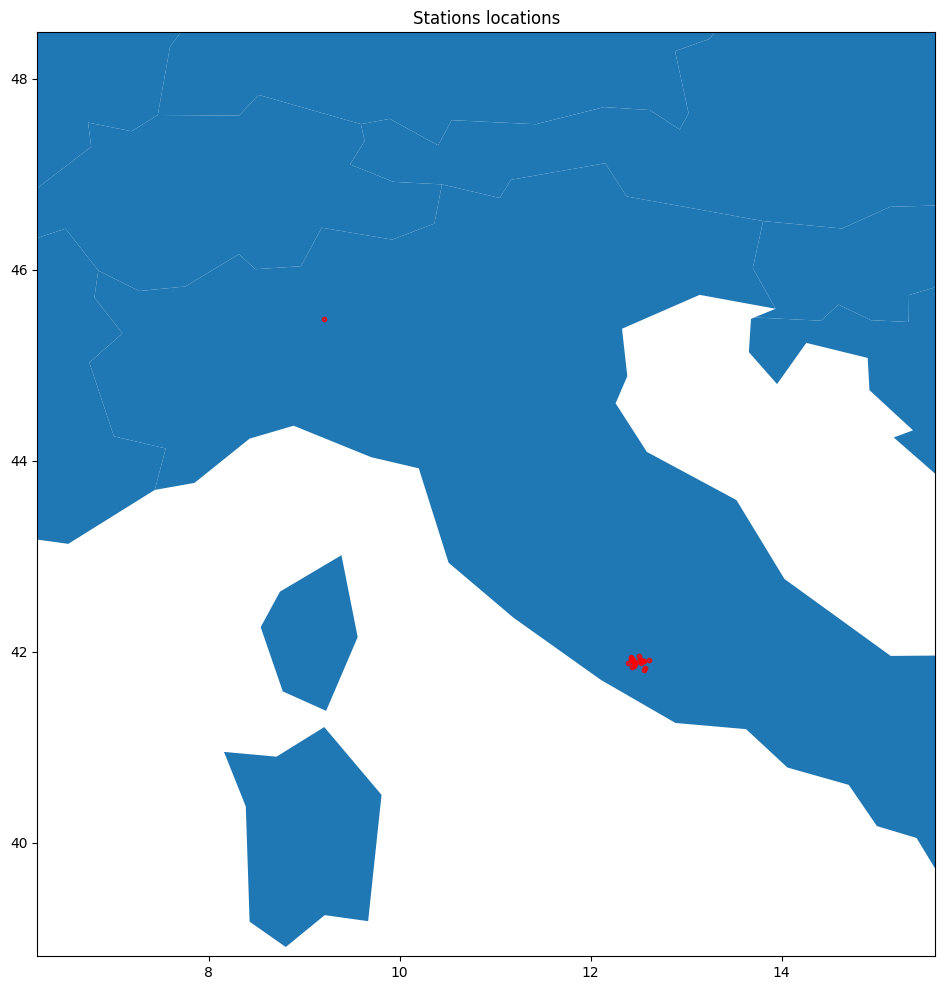

In [131]:
# Where are these stations located?
Borders = ((df_stations.lon.min(),   df_stations.lon.max(),      
         df_stations.lat.min(), df_stations.lat.max()))

train_geo = gpd.GeoDataFrame(df_stations, geometry = gpd.points_from_xy(df_stations.lon, df_stations.lat))

# Get built in dataset from geopandas
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


# Plot map
fig = train_geo.plot(ax=world_data.plot(figsize=(20, 12)), 
               kind = 'geo',
               marker='o', 
               markersize=10, 
               alpha = 0.7, 
               scheme = 'BoxPlot',
               color = 'red')
#fig.legend(handles = labels)
fig.set_title('Stations locations')


fig.axis(xmin = Borders[0]-3, 
         xmax = Borders[1]+3, 
         ymin = Borders[2]-3, 
         ymax = Borders[3]+3)

df_stations = df_stations.drop(columns=['geometry'])

There are no train stations in Venice, it is unlikely that the distance yields useful information.

In [85]:
add_poi(df_train, df_stations, "tags.station")
df_train.rename(columns={'distance_from_tags.station': 'distance_from_station'}, inplace = True)

In [86]:
df_train

id   price  conditions  construction_year   latitude  longitude  \
0      10461   60000         2.0             1980.0  41.901300  12.700000   
1      51304  900000         2.0             1988.0  41.907017  12.481311   
2      33032   33000         2.0             1960.0  41.976500  12.440500   
3      62281  166000         4.0             1950.0  45.484800  12.198200   
4      45681  410000         2.0             1976.0  45.424480  12.328622   
...      ...     ...         ...                ...        ...        ...   
46298  33085  329999         2.0             1929.0  41.923500  12.446100   
46299  17403  599000         1.0             1920.0  41.916743  12.454925   
46300  33332  549000         2.0             1842.0  45.454701   9.242711   
46301  63367  189000         2.0             1965.0  45.445605   9.245942   
46302  27322  355000         4.0             1970.0  41.877000  12.431400   

       floor  n_bathrooms  n_rooms  proximity_to_center  surface    City  \
0        2.0          1.0      1.0              1.00000     35.0    Rome   
1        3.0          1.0      3.0              1.00000    131.0    Rome   
2        4.0          1.0      1.0              1.00000     16.0    Rome   
3        1.0          1.0      2.0              0.99205    100.0  Venice   
4        3.0          2.0      3.0              1.00000     90.0  Venice   
...      ...          ...      ...                  ...      ...     ...   
46298    3.0          1.0      3.0              1.00000     88.0    Rome   
46299    6.0          2.0      5.0              1.00000    189.0    Rome   
46300    2.0          2.0      3.0              1.00000    140.0   Milan   
46301   -1.0          1.0      3.0              1.00000     70.0   Milan   
46302    1.0          1.0      4.0              1.00000    101.0    Rome   

       distance_from_center  neighborhood  distance_from_station  
0                 18.006584          27.0               7.543650  
1                  1.274374          28.0               1.896061  
2                  9.645936          38.0               4.442287  
3                 12.303577          46.0             233.313491  
4                  1.308265          41.0             243.707636  
...                     ...           ...                    ...  
46298              4.328731          16.0               0.889061  
46299              3.281043          28.0               1.432022  
46300              4.122032          10.0               4.613117  
46301              4.698838          10.0               5.572954  
46302              4.713929          25.0               2.263425  

[46287 rows x 15 columns]

In [87]:
print(df_train[["distance_from_station", "price"]].corr()) #very low correlation (-0.02), maybe noise due to Venice?
MI_RM = df_train.loc[df_train['City']!='Venice']
print(MI_RM[["distance_from_station", "price"]].corr()) # Correlation: -0.08661. Still low , remove the feature
df_train.drop('distance_from_station', axis =1, inplace = True)


                       distance_from_station     price
distance_from_station               1.000000 -0.023229
price                              -0.023229  1.000000
                       distance_from_station     price
distance_from_station               1.000000 -0.085557
price                              -0.085557  1.000000


#### Amenities
Explore the impact on price of houses' distance from different facilities.

In [88]:
set(poi_df['tags.amenity'])

{'Lasergame',
 'Music_venue',
 'Restaurant',
 'animal_boarding',
 'animal_breeding',
 'animal_shelter',
 'archive',
 'art_gallery',
 'arts_centre',
 'atm',
 'bank',
 'bar',
 'bbq',
 'bench',
 'bench;waste_basket',
 'bicycle_parking',
 'bicycle_rental',
 'bicycle_rental;bar',
 'bicycle_repair_station',
 'biergarten',
 'boat_rental',
 'boat_sharing',
 'brothel',
 'bureau_de_change',
 'bus_station',
 'cafe',
 'cafe;restaurant',
 'canteen',
 'car_rental',
 'car_sharing',
 'car_wash',
 'casino',
 'charging_station',
 'childcare',
 'cinema',
 'clinic',
 'clock',
 'club',
 'college',
 'community_centre',
 'compressed_air',
 'conference_centre',
 'courier',
 'courthouse',
 'coworking_space',
 'crypt',
 'dancing_school',
 'dentist',
 'device_charging_station',
 'dispenser',
 'disused:pub',
 'doctors',
 'dojo',
 'dormitory',
 'dressing_room',
 'drinking_water',
 'driving_school',
 'events_venue',
 'fablab',
 'fast_food',
 'ferry_terminal',
 'fire_station',
 'food_court',
 'fountain',
 'fuel',
 '

Let's take the distance from universities as variable, since often being near to an university positively affects an house's price.

In [89]:
df_universities = poi_df.loc[poi_df['tags.amenity']=='university']
df_universities = df_universities[["lat", "lon"]]
df_universities.head()

lat       lon
95     45.461191  9.186723
11473  45.476627  9.227500
43135  45.463955  9.169101
44204  45.471942  9.187820
58707  45.510953  9.211261

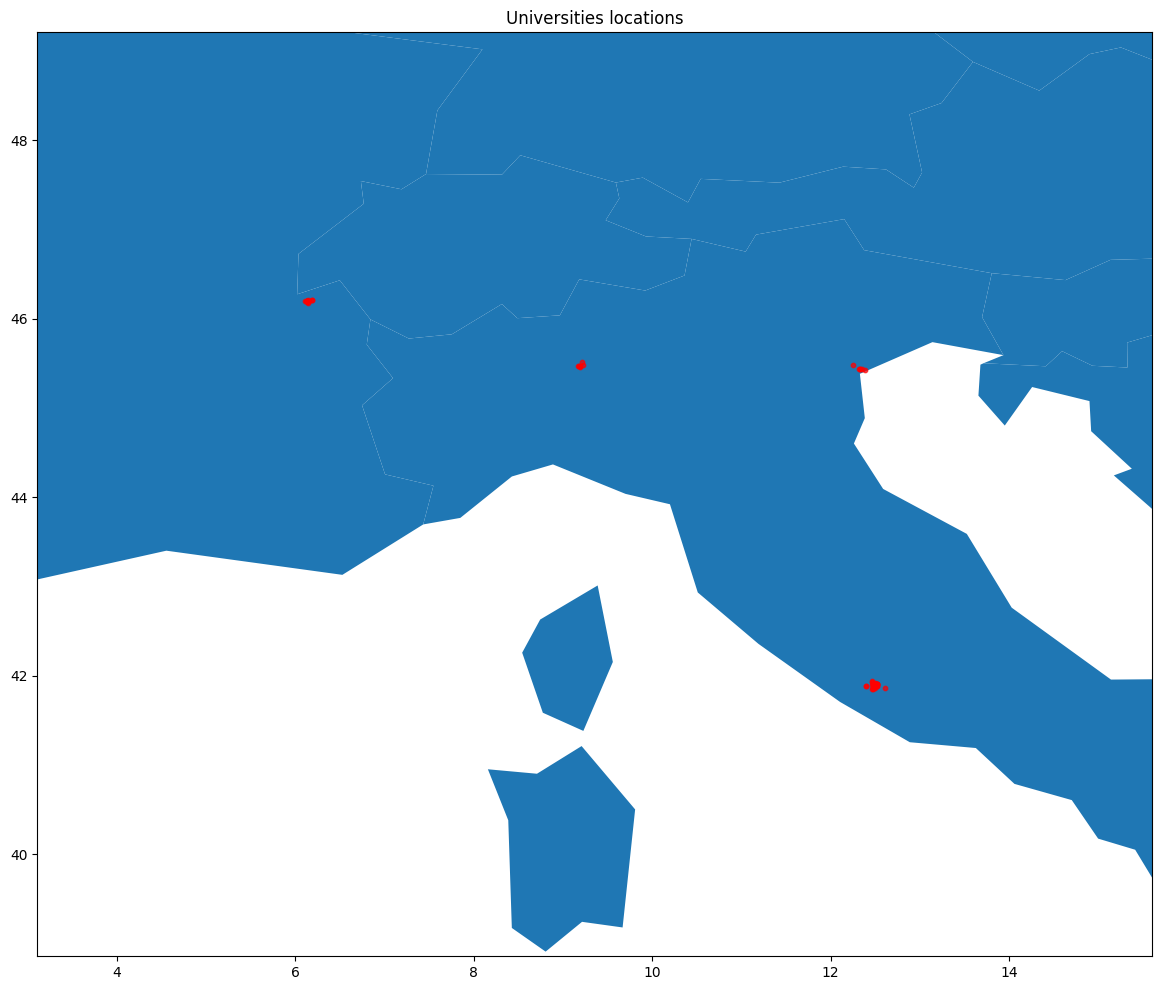

In [90]:
# Visualize the universities on map
Borders = ((df_universities.lon.min(),   df_universities.lon.max(),      
         df_universities.lat.min(), df_universities.lat.max()))

train_geo = gpd.GeoDataFrame(df_universities, geometry = gpd.points_from_xy(df_universities.lon, df_universities.lat))

# Get built in dataset from geopandas
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


# Plot map
fig = train_geo.plot(ax=world_data.plot(figsize=(20, 12)), 
               kind = 'geo',
               marker='o', 
               markersize=10, 
               alpha = 0.7, 
               scheme = 'BoxPlot',
               color = 'red')
#fig.legend(handles = labels)
fig.set_title('Universities locations')


fig.axis(xmin = Borders[0]-3, 
         xmax = Borders[1]+3, 
         ymin = Borders[2]-3, 
         ymax = Borders[3]+3)

df_universities = df_universities.drop(columns=['geometry'])

In [91]:
add_poi(df_train, df_universities, "university")

id   price  conditions  construction_year   latitude  longitude  \
0      10461   60000         2.0             1980.0  41.901300  12.700000   
1      51304  900000         2.0             1988.0  41.907017  12.481311   
2      33032   33000         2.0             1960.0  41.976500  12.440500   
3      62281  166000         4.0             1950.0  45.484800  12.198200   
4      45681  410000         2.0             1976.0  45.424480  12.328622   
...      ...     ...         ...                ...        ...        ...   
46298  33085  329999         2.0             1929.0  41.923500  12.446100   
46299  17403  599000         1.0             1920.0  41.916743  12.454925   
46300  33332  549000         2.0             1842.0  45.454701   9.242711   
46301  63367  189000         2.0             1965.0  45.445605   9.245942   
46302  27322  355000         4.0             1970.0  41.877000  12.431400   

       floor  n_bathrooms  n_rooms  proximity_to_center  surface    City  \
0        2.0          1.0      1.0              1.00000     35.0    Rome   
1        3.0          1.0      3.0              1.00000    131.0    Rome   
2        4.0          1.0      1.0              1.00000     16.0    Rome   
3        1.0          1.0      2.0              0.99205    100.0  Venice   
4        3.0          2.0      3.0              1.00000     90.0  Venice   
...      ...          ...      ...                  ...      ...     ...   
46298    3.0          1.0      3.0              1.00000     88.0    Rome   
46299    6.0          2.0      5.0              1.00000    189.0    Rome   
46300    2.0          2.0      3.0              1.00000    140.0   Milan   
46301   -1.0          1.0      3.0              1.00000     70.0   Milan   
46302    1.0          1.0      4.0              1.00000    101.0    Rome   

       distance_from_center  neighborhood  distance_from_university  
0                 18.006584          27.0                  9.283095  
1                  1.274374          28.0                  0.568945  
2                  9.645936          38.0                  4.914015  
3                 12.303577          46.0                  4.469370  
4                  1.308265          41.0                  1.126559  
...                     ...           ...                       ...  
46298              4.328731          16.0                  1.492915  
46299              3.281043          28.0                  1.824127  
46300              4.122032          10.0                  2.711304  
46301              4.698838          10.0                  3.737331  
46302              4.713929          25.0                  3.052482  

[46287 rows x 15 columns]

In [92]:
df_train.corr()['distance_from_university'].sort_values() #Check correlationwith other features

/var/folders/pq/60k1kqqn47j9qs8l3yf05hw00000gp/T/ipykernel_58187/3415792624.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()['distance_from_university'].sort_values() #Check correlationwith other features


proximity_to_center        -0.527706
latitude                   -0.338174
price                      -0.119962
floor                      -0.085976
id                          0.003691
n_rooms                     0.008222
conditions                  0.021842
surface                     0.040112
n_bathrooms                 0.057588
neighborhood                0.104683
construction_year           0.187209
longitude                   0.210479
distance_from_center        0.883549
distance_from_university    1.000000
Name: distance_from_university, dtype: float64

As could be expected, university_distance is negatively correlated with price. However, it has a very significant correlation with distance_from_center, so we drop the column 'university_distance' to avoid problems of multicollinearity.

In [93]:
df_train.drop('distance_from_university',  axis = 1, inplace = True)

# Processed dataframe Correlations

/var/folders/pq/60k1kqqn47j9qs8l3yf05hw00000gp/T/ipykernel_58187/3068135239.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat_new = df_train.corr()


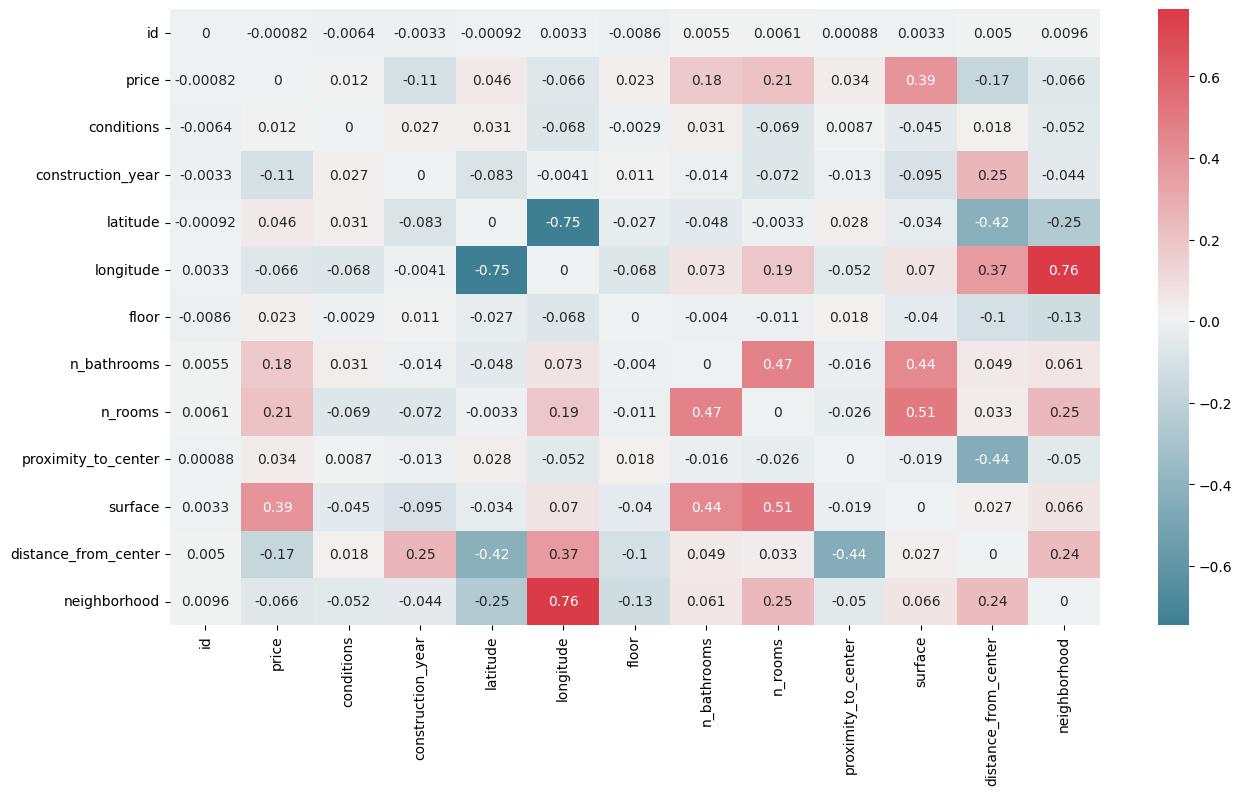

In [94]:
# New Correlation Matrix
corrmat_new = df_train.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corrmat_new-np.eye(corrmat_new.shape[0]), annot = True, cmap = sns.diverging_palette(220, 10, as_cmap=True))
plt.show()

# Model

In [95]:
train_data = df_train.copy()
cities = {'Milan': 1, 'Rome': 2, 'Venice': 3}
train_data['City'] = train_data['City'].apply(lambda x: cities[x]) # Transform categorical variable with ordinal encoding

In [96]:
train_clean_X = train_data.drop(columns = ['price','id'])
train_clean_X = train_clean_X.reset_index(drop=True)
train_clean_y = train_data['price']
X_train, X_test, y_train, y_test = train_test_split(train_clean_X, train_clean_y, test_size=0.2, random_state = 27) # Split train data to test models

## Linear Regression

In [97]:
df_train.corr()['price'].sort_values()

/var/folders/pq/60k1kqqn47j9qs8l3yf05hw00000gp/T/ipykernel_58187/2351276530.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()['price'].sort_values()


distance_from_center   -0.170129
construction_year      -0.107477
longitude              -0.065650
neighborhood           -0.065505
id                     -0.000817
conditions              0.012229
floor                   0.023379
proximity_to_center     0.033982
latitude                0.045929
n_bathrooms             0.180574
n_rooms                 0.206091
surface                 0.393335
price                   1.000000
Name: price, dtype: float64

In [98]:
lin_reg = LinearRegression()

lin_reg.fit(X_train[['surface','distance_from_center','n_rooms','construction_year']], y_train) # select most correlated features

y_pred = lin_reg.predict(X_test[['surface','distance_from_center','n_rooms','construction_year']])

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:0.5}")
print("R-squared: ", r2)

Mean squared error: 6.2933e+11
R-squared:  0.2569866053032335


Linear regression doesn't seem to perform well. Probably too many regressors

## KNN regression

Text(0, 0.5, 'MSE')

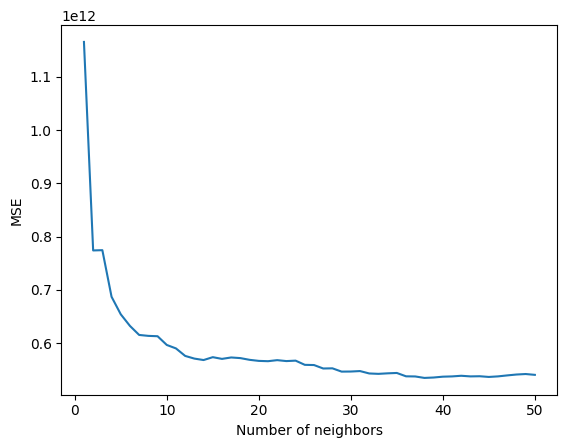

In [99]:
from sklearn.neighbors import KNeighborsRegressor
errors = []
r2s = []
for i in range(1,51):
    knn_model = KNeighborsRegressor(n_neighbors=i)

    knn_model.fit(X_train, y_train)

    y_pred = knn_model.predict(X_test)

    errors.append(mean_squared_error(y_test, y_pred))
    r2s.append(r2_score(y_test, y_pred))
plt.plot(np.arange(1,51),errors)
plt.xlabel('Number of neighbors')
plt.ylabel('MSE')

In [113]:
print(f"Best MSE: {min(errors):0.5}. \nBest R^2: {max(r2s)}.")

Best MSE: 5.3496e+11. 
Best R^2: 0.3684054589073884.


Doesn't look like a great model. Let's try with Random Forest.

## Random Forest

### Test on splitted df_train

In [100]:
rf_train = RandomForestRegressor(n_estimators=300)
rf_train.fit(X_train, y_train)

y_pred = rf_train.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:0.5}")
print("R-squared: ", r2)

Mean squared error: 4.7744e+11
R-squared:  0.43631424531890384


In [101]:
# Get the feature importances
importances = rf_train.feature_importances_

# Sort the importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for i, index in enumerate(indices):
    print(f"{i + 1}. Feature {X_train.columns[index]}: importance {importances[index]}")

Feature ranking:
1. Feature surface: importance 0.3373228533933197
2. Feature distance_from_center: importance 0.26434827272153477
3. Feature longitude: importance 0.0841303597085289
4. Feature latitude: importance 0.07602895512895294
5. Feature construction_year: importance 0.0728095019157494
6. Feature floor: importance 0.044142276609029196
7. Feature conditions: importance 0.04343617589829304
8. Feature neighborhood: importance 0.03094232085290885
9. Feature n_rooms: importance 0.027337540021681053
10. Feature n_bathrooms: importance 0.011670760336165313
11. Feature City: importance 0.006438949940766928
12. Feature proximity_to_center: importance 0.0013920334730700545


In [102]:
X_train2 = X_train.drop(columns=['proximity_to_center','City'], axis = 1)
X_test2 = X_test.drop(columns=['proximity_to_center','City'], axis = 1)

rf_train2 = RandomForestRegressor(n_estimators=300)
rf_train2.fit(X_train2, y_train)

y_pred = rf_train2.predict(X_test2)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:0.5}")
print("R-squared: ", r2)

Mean squared error: 4.7054e+11
R-squared:  0.44446439842669616


Slight improvement, keep this model.

## Random Forest: model divided per cities

In [103]:
Milan_train = train_data.loc[train_data['City']==1]
Rome_train = train_data.loc[train_data['City']==2]
Venice_train = train_data.loc[train_data['City']==3]

Milan_clean_X = Milan_train.drop(columns = ['price','id'])
Milan_clean_X = Milan_clean_X.reset_index(drop=True)
Milan_clean_y = Milan_train['price']
X_train_MI, X_test_MI, y_train_MI, y_test_MI = train_test_split(Milan_clean_X, Milan_clean_y, test_size=0.2, random_state = 27) # Split train data to test models

Rome_clean_X = Rome_train.drop(columns = ['price','id'])
Rome_clean_X = Rome_clean_X.reset_index(drop=True)
Rome_clean_y = Rome_train['price']
X_train_RM, X_test_RM, y_train_RM, y_test_RM = train_test_split(Rome_clean_X, Rome_clean_y, test_size=0.2, random_state = 27) # Split train data to test models

Venice_clean_X = Venice_train.drop(columns = ['price','id'])
Venice_clean_X = Venice_clean_X.reset_index(drop=True)
Venice_clean_y = Venice_train['price']
X_train_VE, X_test_VE, y_train_VE, y_test_VE = train_test_split(Venice_clean_X, Venice_clean_y, test_size=0.2, random_state = 27) # Split train data to test models

In [ ]:
rf_MI = RandomForestRegressor(n_estimators=300)
rf_RM = RandomForestRegressor(n_estimators=300)
rf_VE = RandomForestRegressor(n_estimators=300)

rf_MI.fit(X_train_MI, y_train_MI)
rf_RM.fit(X_train_RM, y_train_RM)
rf_VE.fit(X_train_VE, y_train_VE)

MI_pred = rf_MI.predict(X_test_MI)
RM_pred = rf_RM.predict(X_test_RM)
VE_pred = rf_VE.predict(X_test_VE)

mse_MI = mean_squared_error(MI_pred, y_test_MI)
mse_RM = mean_squared_error(RM_pred, y_test_RM)
mse_VE = mean_squared_error(VE_pred, y_test_VE)

r2_MI = r2_score(MI_pred, y_test_MI)
r2_RM = r2_score(RM_pred, y_test_RM)
r2_VE = r2_score(VE_pred, y_test_VE)



In [107]:
total_MSE = (mse_MI+mse_RM+mse_VE)/3
total_r2 = 1 - (1 - r2_MI) * (1 - r2_RM) * (1 - r2_VE)

print(f"The total MSE of the three models differentiating per city is: {total_MSE:0.5}")
print(f"The total R^2 of the three models differentiating per city is: {total_r2}")

The total MSE of the three models differentiating per city is: 6.0942e+11
The total R^2 of the three models differentiating per city is: 0.3953929868152323


Performs worse than the general model, probably because less able to generalize.

## Final Model
Model trained on the complete train dataset.

In [114]:
X_train = train_data.drop(columns = ['price','id','proximity_to_center','City'])
X_train = X_train.reset_index(drop=True)
y_train = train_data['price']

rf = RandomForestRegressor(n_estimators=300)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300)

In [115]:
# Get the feature importances
importances = rf.feature_importances_

# Sort the importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for i, index in enumerate(indices):
    print(f"{i + 1}. Feature {X_train.columns[index]}: importance {importances[index]}")

Feature ranking:
1. Feature surface: importance 0.347040908304353
2. Feature distance_from_center: importance 0.2614248995674985
3. Feature longitude: importance 0.09283173247004343
4. Feature latitude: importance 0.08178865294591983
5. Feature construction_year: importance 0.06570042345183222
6. Feature conditions: importance 0.04182579931238778
7. Feature floor: importance 0.03713573968180437
8. Feature neighborhood: importance 0.03400589420574394
9. Feature n_rooms: importance 0.026207790442582098
10. Feature n_bathrooms: importance 0.01203815961783475


# Test Predictions

## Load test data

In [116]:
df_test = pd.read_csv('test_updated.csv')

## Overview on Test Data

### Missing values

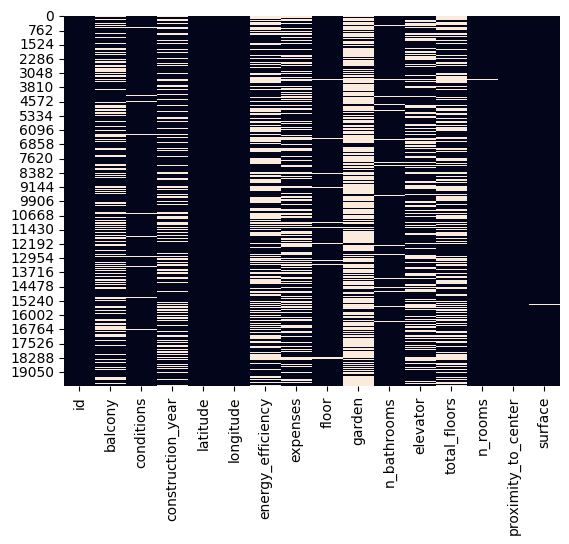

Total   Percent
garden               13443  0.679351
energy_efficiency     8570  0.433091
total_floors          7938  0.401152
elevator              7455  0.376743
expenses              6971  0.352284
balcony               6732  0.340206
construction_year     5964  0.301395
n_bathrooms            951  0.048059
floor                  876  0.044269
conditions             511  0.025824
surface                163  0.008237
n_rooms                141  0.007126
latitude                10  0.000505
longitude               10  0.000505
proximity_to_center     10  0.000505
id                       0  0.000000

In [117]:
sns.heatmap(df_test.isna(), cbar=False)
plt.show() 
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

In [118]:
# Missing values imputing in one function.

def preprocessing(data_test, data_train):
    """ The function takes as input the test data_testset in order to fill the null values, 
     according to the values of train data_testset, which must have the same features.
      """
    
    data_test['latitude'] = data_test['latitude'].fillna(data_train['latitude'].median())
    data_test['longitude'] = data_test['longitude'].fillna(data_train['longitude'].median())
    data_test['proximity_to_center'] = data_test['proximity_to_center'].fillna(1.0)


    data_test.drop('total_floors',axis=1, inplace=True)
    data_test.drop('garden',axis=1, inplace=True)
    data_test.drop('balcony',axis=1, inplace=True)
    data_test.drop('expenses',axis=1, inplace=True)
    data_test.drop('energy_efficiency',axis=1, inplace=True)
    data_test.drop('elevator',axis=1, inplace=True)
    

    median_rooms = int(data_train['n_rooms'].median())
    data_test['n_rooms'] = data_test['n_rooms'].fillna(median_rooms)
    
    median_baths = int(data_train['n_bathrooms'].median())
    data_test['n_bathrooms'] = data_test['n_bathrooms'].fillna(median_baths)

    X_test = data_test.loc[data_test['surface'].isna()][['n_bathrooms','n_rooms']]
    pred_surface_test = model_surface.predict(X_test)
    data_test.loc[data_test['surface'].isna(),'surface'] = pred_surface_test
    # median_surface = data_train.surface.median()
    # data_test['surface'] = data_test['surface'].fillna(median_surface)
    

    data_test['conditions'] = data_test['conditions'].replace({'Da ristrutturare': 1, 'Buono stato / Abitabile': 2, 'Nuovo / Nuova costruzione': 3, 'Ottimo / Ristrutturato': 4 })
    data_test['conditions'] = data_test['conditions'].fillna(0)

    data_test["floor"] =  imputer.transform(data_test.loc[:, :])[:,5]
    data_test["construction_year"] = imputer.transform(data_test.loc[:, :])[:,2]

    assert data_test.isnull().sum().sum() == 0

    return data_test

In [119]:
df_test = preprocessing(df_test,df_train)

### Feature augmentation

#### City, distance from center, and Neighborhood

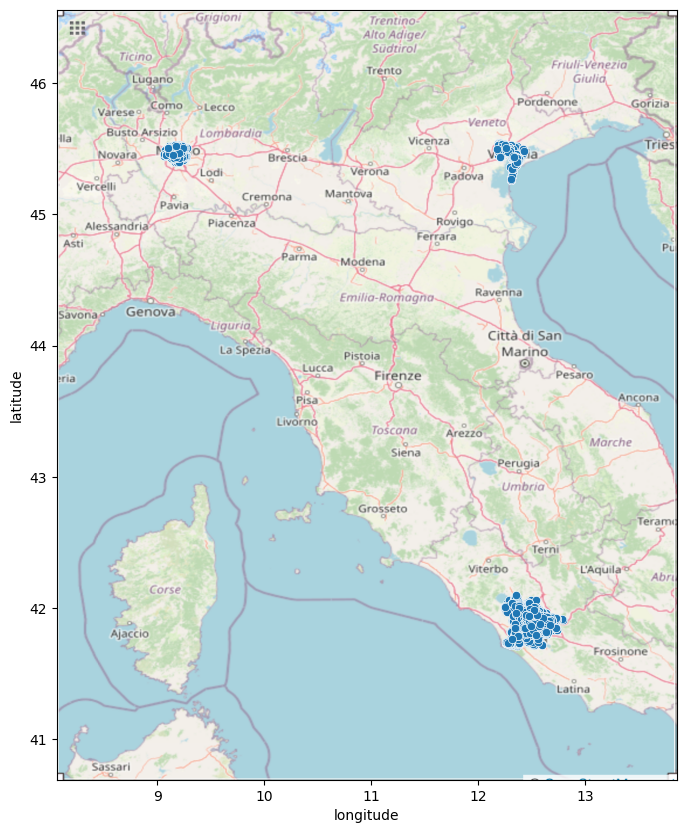

In [120]:
# Check that the test dataset houses belongs to the same cities as the train
image_path = 'Italy.png'
image = mpimg.imread(image_path)

fig = plt.figure(figsize=(8,10))

plt.imshow(image, extent=[8.0607748, 13.8541, 40.6903, 46.56129837], aspect='auto')

sns.scatterplot(data=df_test, x='longitude', y='latitude')

plt.show()

In [121]:
#  Function to determine to which cluster belongs each house

def assign_nearest_cluster(df, cluster_centers):
    # Calculate distances between each house and cluster centers using Haversine formula
    distances = np.sqrt((np.array(df['latitude']).reshape(len(df),1)-cluster_centers[:,1].reshape(1,len(cluster_centers)))**2 + 
                        (np.array(df['longitude']).reshape(len(df),1)-cluster_centers[:,0].reshape(1,len(cluster_centers)))**2)

    # Find the index of the nearest cluster for each house
    nearest_cluster_indices = np.argmin(distances.reshape(len(df),len(cluster_centers)), axis=1)

    # Assign the nearest cluster to each house
    df['nearest_cluster'] = nearest_cluster_indices

    return df

In [122]:
# The cities are always Milan, Rome, and Venice, so the process will be the  same as for the test data.
# This function encodes all of the process carried out on the train data above.

def city_and_distance(data):

    data['City'] = np.zeros(len(data))
    data.loc[data['latitude'] < 44, 'City'] = 'Rome'
    data.loc[data['longitude'] < 10, 'City'] = 'Milan'
    data.loc[data['City'] == 0.0, 'City'] = 'Venice'
    city_centers = {'Milan':(45.463506, 9.191373), 'Rome':(41.895595, 12.482574), 'Venice': (45.434048, 12.338378)}

    Rome = data.loc[data['City']=='Rome'].loc[:,['longitude','latitude']]
    Milan = data.loc[data['City']=='Milan'].loc[:,['longitude','latitude']]
    Venice = data.loc[data['City']=='Venice'].loc[:,['longitude','latitude']]

    data['distance_from_center'] = np.zeros(len(data))

    lats_RM = np.array(Rome['latitude'])
    longs_RM = np.array(Rome['longitude'])

    lats_MI = np.array(Milan['latitude'])
    longs_MI = np.array(Milan['longitude'])

    lats_VE = np.array(Venice['latitude'])
    longs_VE = np.array(Venice['longitude'])


    data.loc[data['City']=='Milan','distance_from_center'] = haversine_distance(lats_MI,longs_MI, np.full(len(lats_MI),city_centers['Milan'][0]),np.full(len(lats_MI),city_centers['Milan'][1]))
    data.loc[data['City']=='Rome','distance_from_center'] = haversine_distance(lats_RM,longs_RM, np.full(len(lats_RM),city_centers['Rome'][0]),np.full(len(lats_RM),city_centers['Rome'][1]))
    data.loc[data['City']=='Venice','distance_from_center'] = haversine_distance(lats_VE,longs_VE, np.full(len(lats_VE),city_centers['Venice'][0]),np.full(len(lats_VE),city_centers['Venice'][1]))

    
    assign_nearest_cluster(Milan, cluster_centers_MI)
    data.loc[data['City']=='Milan', 'neighborhood'] = Milan['nearest_cluster']
    
    
    assign_nearest_cluster(Rome, cluster_centers_RM)
    data.loc[data['City']=='Rome', 'neighborhood'] = Rome['nearest_cluster'] +len(cluster_centers_MI)

    
    assign_nearest_cluster(Venice, cluster_centers_VE)
    data.loc[data['City']=='Venice', 'neighborhood'] = Venice['nearest_cluster'] +len(cluster_centers_MI)+len(cluster_centers_RM)


    return data

In [123]:
df_test = city_and_distance(df_test)
cities = {'Milan':1, 'Rome' : 2, 'Venice':3}
df_test['City'] = df_test['City'].apply(lambda x: cities[x])

In [124]:
df_test

id  conditions  construction_year   latitude  longitude  floor  \
0      18825         3.0             2010.0  41.917500  12.655400    3.0   
1      30956         2.0             1900.0  45.446100  12.326700    0.0   
2      47193         2.0             1967.0  45.456925   9.194406   -1.0   
3      27799         2.0             1962.0  45.483800  12.259000    6.0   
4      22259         2.0             2006.0  41.899400  12.659500    4.0   
...      ...         ...                ...        ...        ...    ...   
19783  22961         2.0             1980.0  41.941600  12.470900    3.0   
19784   4606         2.0             1972.6  45.439948  12.327809    2.0   
19785   6106         2.0             1974.2  41.793900  12.533000    0.0   
19786  35370         4.0             1970.0  41.879000  12.577900    1.0   
19787  24890         2.0             2013.0  41.759900  12.314900    0.0   

       n_bathrooms  n_rooms  proximity_to_center  surface  City  \
0              1.0      2.0             1.000000     72.0     2   
1              1.0      2.0             1.000000     60.0     3   
2              3.0      3.0             1.000000    140.0     1   
3              1.0      3.0             1.000000     98.0     3   
4              2.0      3.0             1.000000     83.0     2   
...            ...      ...                  ...      ...   ...   
19783          2.0      4.0             1.000000    135.0     2   
19784          1.0      2.0             1.000000    120.0     3   
19785          2.0      3.0             1.000000    112.0     2   
19786          1.0      3.0             1.000000     50.0     2   
19787          1.0      3.0             0.995808     50.0     2   

       distance_from_center  neighborhood  
0                 14.508168          27.0  
1                  1.620515          41.0  
2                  0.769031           2.0  
3                  8.302641          40.0  
4                 14.649727          27.0  
...                     ...           ...  
19783              5.205914          16.0  
19784              1.053779          41.0  
19785             12.054786          29.0  
19786              8.103980          22.0  
19787             20.510509          21.0  

[19788 rows x 13 columns]

/var/folders/pq/60k1kqqn47j9qs8l3yf05hw00000gp/T/ipykernel_58187/331771470.py:6: UserWarning: 
The palette list has fewer values (12) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=Milan_test, x='longitude', y='latitude', hue='neighborhood', palette=['Brown','black','blue', 'green', 'red', 'orange','purple','grey','cyan','Violet','magenta','Indigo'], ax = axs[0])
/var/folders/pq/60k1kqqn47j9qs8l3yf05hw00000gp/T/ipykernel_58187/331771470.py:10: UserWarning: 
The palette list has fewer values (12) than needed (25) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=Rome_test, x='longitude', y='latitude', hue='neighborhood', palette=['Brown','black','blue', 'green', 'red', 'orange','purple','grey','cyan','Violet','magenta','Indigo'], ax = axs[1])
/var/folders/pq/60k1kqqn47j9qs8l3yf05hw00000gp/T/ipykernel_58187/331771470.py:13: UserWarning: The palette list has more values (12) than needed (8), which may not 

<function matplotlib.pyplot.show(close=None, block=None)>

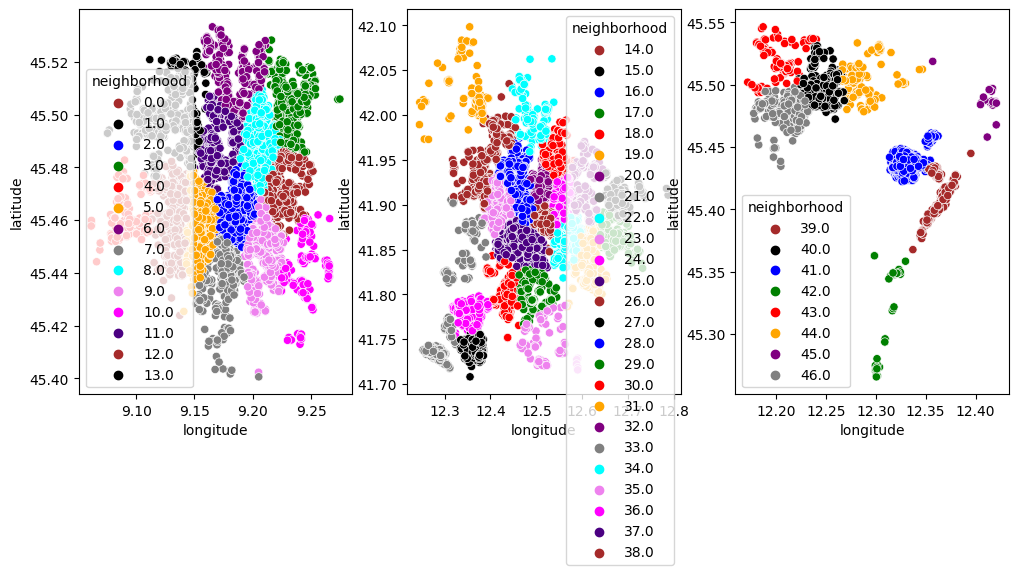

In [125]:
# Check that the cluster assignment makes sense

fig, axs = plt.subplots(ncols=3, figsize=(12, 5))

Milan_test = df_test.loc[df_test['City']==1]
sns.scatterplot(data=Milan_test, x='longitude', y='latitude', hue='neighborhood', palette=['Brown','black','blue', 'green', 'red', 'orange','purple','grey','cyan','Violet','magenta','Indigo'], ax = axs[0])


Rome_test = df_test.loc[df_test['City']==2]
sns.scatterplot(data=Rome_test, x='longitude', y='latitude', hue='neighborhood', palette=['Brown','black','blue', 'green', 'red', 'orange','purple','grey','cyan','Violet','magenta','Indigo'], ax = axs[1])

Venice_test = df_test.loc[df_test['City']==3]
sns.scatterplot(data=Venice_test, x='longitude', y='latitude', hue='neighborhood', palette=['Brown','black','blue', 'green', 'red', 'orange','purple','grey','cyan','Violet','magenta','Indigo'], ax = axs[2])

plt.show

## Predict prices

In [130]:
df_test_clean = df_test.drop(columns=['City','id','proximity_to_center'])
final_pred = rf.predict(df_test_clean)
final_submission = pd.DataFrame({'id': df_test['id'], 'price': final_pred})
final_submission

id         price
0      18825  1.554333e+05
1      30956  2.453567e+05
2      47193  1.151937e+06
3      27799  1.705414e+05
4      22259  1.915198e+05
...      ...           ...
19783  22961  5.707811e+05
19784   4606  5.553884e+05
19785   6106  2.416858e+05
19786  35370  1.314330e+05
19787  24890  1.817620e+05

[19788 rows x 2 columns]

In [127]:
final_submission.to_csv('/Users/francescovacca/Desktop/final_submission.csv', index = False)